## Setup

### Importing libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [ ]:
# Loading the crime dataset
df = pd.read_csv("/content/drive/MyDrive/Group Project Week 5/crime.csv", encoding='latin-1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Previewing the dataset

In [ ]:
# Previewing the crime dataset after loading
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018.0,9.0,Sunday,13.0,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018.0,8.0,Tuesday,0.0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018.0,9.0,Monday,19.0,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018.0,9.0,Monday,21.0,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018.0,9.0,Monday,21.0,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018.0,9.0,Monday,21.0,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018.0,9.0,Monday,21.0,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018.0,9.0,Monday,20.0,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018.0,9.0,Monday,20.0,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018.0,9.0,Monday,20.0,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


### Accessing information about our dataset

In [ ]:
# Viewing the information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [ ]:
# Shape of dataframe
df.shape

(57721, 17)

In [ ]:
# Number of missing values per column
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                 499
REPORTING_AREA             1
SHOOTING               57569
OCCURRED_ON_DATE           1
YEAR                       1
MONTH                      1
DAY_OF_WEEK                1
HOUR                       1
UCR_PART                  15
STREET                  1001
Lat                     3695
Long                    3695
Location                   1
dtype: int64

In [ ]:
# Number of crimes
df['OFFENSE_CODE_GROUP'].nunique()

60

## Cleaning

In [ ]:
# Dropping columns
columns = ["SHOOTING", "Lat", "Long", "Location", "STREET", "OCCURRED_ON_DATE"]
df.drop(columns, axis = 1, inplace = True)

In [ ]:
df.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018,9,Sunday,13,Part One
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018,8,Tuesday,0,Part Two
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018,9,Monday,19,Part Three


In [ ]:
# Null values
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT               1765
REPORTING_AREA            0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                 90
dtype: int64

In [ ]:
df.iloc[20]

INCIDENT_NUMBER                           I182070913
OFFENSE_CODE                                    3006
OFFENSE_CODE_GROUP                Medical Assistance
OFFENSE_DESCRIPTION    SICK/INJURED/MEDICAL - PERSON
DISTRICT                                         NaN
REPORTING_AREA                                      
YEAR                                            2018
MONTH                                              9
DAY_OF_WEEK                                   Monday
HOUR                                              18
UCR_PART                                  Part Three
Name: 20, dtype: object

In [ ]:
df = df.dropna(axis = 0, how ='any')

In [ ]:
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
dtype: int64

In [ ]:
df.shape

(317218, 11)

In [ ]:
# lowercase

df.columns = map(str.lower, df.columns)
df.columns

Index(['incident_number', 'offense_code', 'offense_code_group',
       'offense_description', 'district', 'reporting_area', 'year', 'month',
       'day_of_week', 'hour', 'ucr_part'],
      dtype='object')

In [ ]:
df["offense_description"] = df["offense_description"].str.lower()
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,year,month,day_of_week,hour,ucr_part
0,I182070945,619,Larceny,larceny all others,D14,808,2018,9,Sunday,13,Part One
1,I182070943,1402,Vandalism,vandalism,C11,347,2018,8,Tuesday,0,Part Two
2,I182070941,3410,Towed,towed motor vehicle,D4,151,2018,9,Monday,19,Part Three
3,I182070940,3114,Investigate Property,investigate property,D4,272,2018,9,Monday,21,Part Three
4,I182070938,3114,Investigate Property,investigate property,B3,421,2018,9,Monday,21,Part Three


In [ ]:
# duplicates

df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# convert datatypes

df["offense_code"] = df["offense_code"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317195 entries, 0 to 319072
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   incident_number      317195 non-null  object
 1   offense_code         317195 non-null  object
 2   offense_code_group   317195 non-null  object
 3   offense_description  317195 non-null  object
 4   district             317195 non-null  object
 5   reporting_area       317195 non-null  object
 6   year                 317195 non-null  int64 
 7   month                317195 non-null  int64 
 8   day_of_week          317195 non-null  object
 9   hour                 317195 non-null  int64 
 10  ucr_part             317195 non-null  object
dtypes: int64(3), object(8)
memory usage: 29.0+ MB


In [ ]:
# Replacing values
df["ucr_part"].replace({"Part One": 1, "Part Two": 2, "Part Three": 3, "Other": 4}, inplace=True)

In [ ]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,year,month,day_of_week,hour,ucr_part
0,I182070945,619,Larceny,larceny all others,D14,808,2018,9,Sunday,13,1
1,I182070943,1402,Vandalism,vandalism,C11,347,2018,8,Tuesday,0,2
2,I182070941,3410,Towed,towed motor vehicle,D4,151,2018,9,Monday,19,3
3,I182070940,3114,Investigate Property,investigate property,D4,272,2018,9,Monday,21,3
4,I182070938,3114,Investigate Property,investigate property,B3,421,2018,9,Monday,21,3


In [ ]:
# Number of UCR Types and how many are null
df["ucr_part"].value_counts()


3    157515
2     97049
1     61410
4      1221
Name: ucr_part, dtype: int64

### Exporting the cleaned Data


In [ ]:
df.to_csv('clean_crime.csv')

In [ ]:
# We will first load the sql extension into our environment
%load_ext sql

# Then connect to our in memory sqlite database
# NB: This database will cease to exist as soon as the database connection is closed. 
%sql sqlite://

'Connected: @None'

In [ ]:
# Loading our table from the respective CSV files 
with open('clean_crime.csv','r') as f:
    clean_crime = pd.read_csv(f, index_col=0, encoding='utf-8')
# saving the clean_crime CSV file into a database
%sql DROP TABLE if EXISTS clean_crime;
%sql PERSIST clean_crime;

# Displaying the first  5 entries 
%sql SELECT * FROM clean_crime LIMIT 5;

 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.


index,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,year,month,day_of_week,hour,ucr_part
0,I182070945,619,Larceny,larceny all others,D14,808,2018.0,9.0,Sunday,13.0,1
1,I182070943,1402,Vandalism,vandalism,C11,347,2018.0,8.0,Tuesday,0.0,2
2,I182070941,3410,Towed,towed motor vehicle,D4,151,2018.0,9.0,Monday,19.0,3
3,I182070940,3114,Investigate Property,investigate property,D4,272,2018.0,9.0,Monday,21.0,3
4,I182070938,3114,Investigate Property,investigate property,B3,421,2018.0,9.0,Monday,21.0,3


## Analysis

### Visualizing Data

#### Bar Graphs

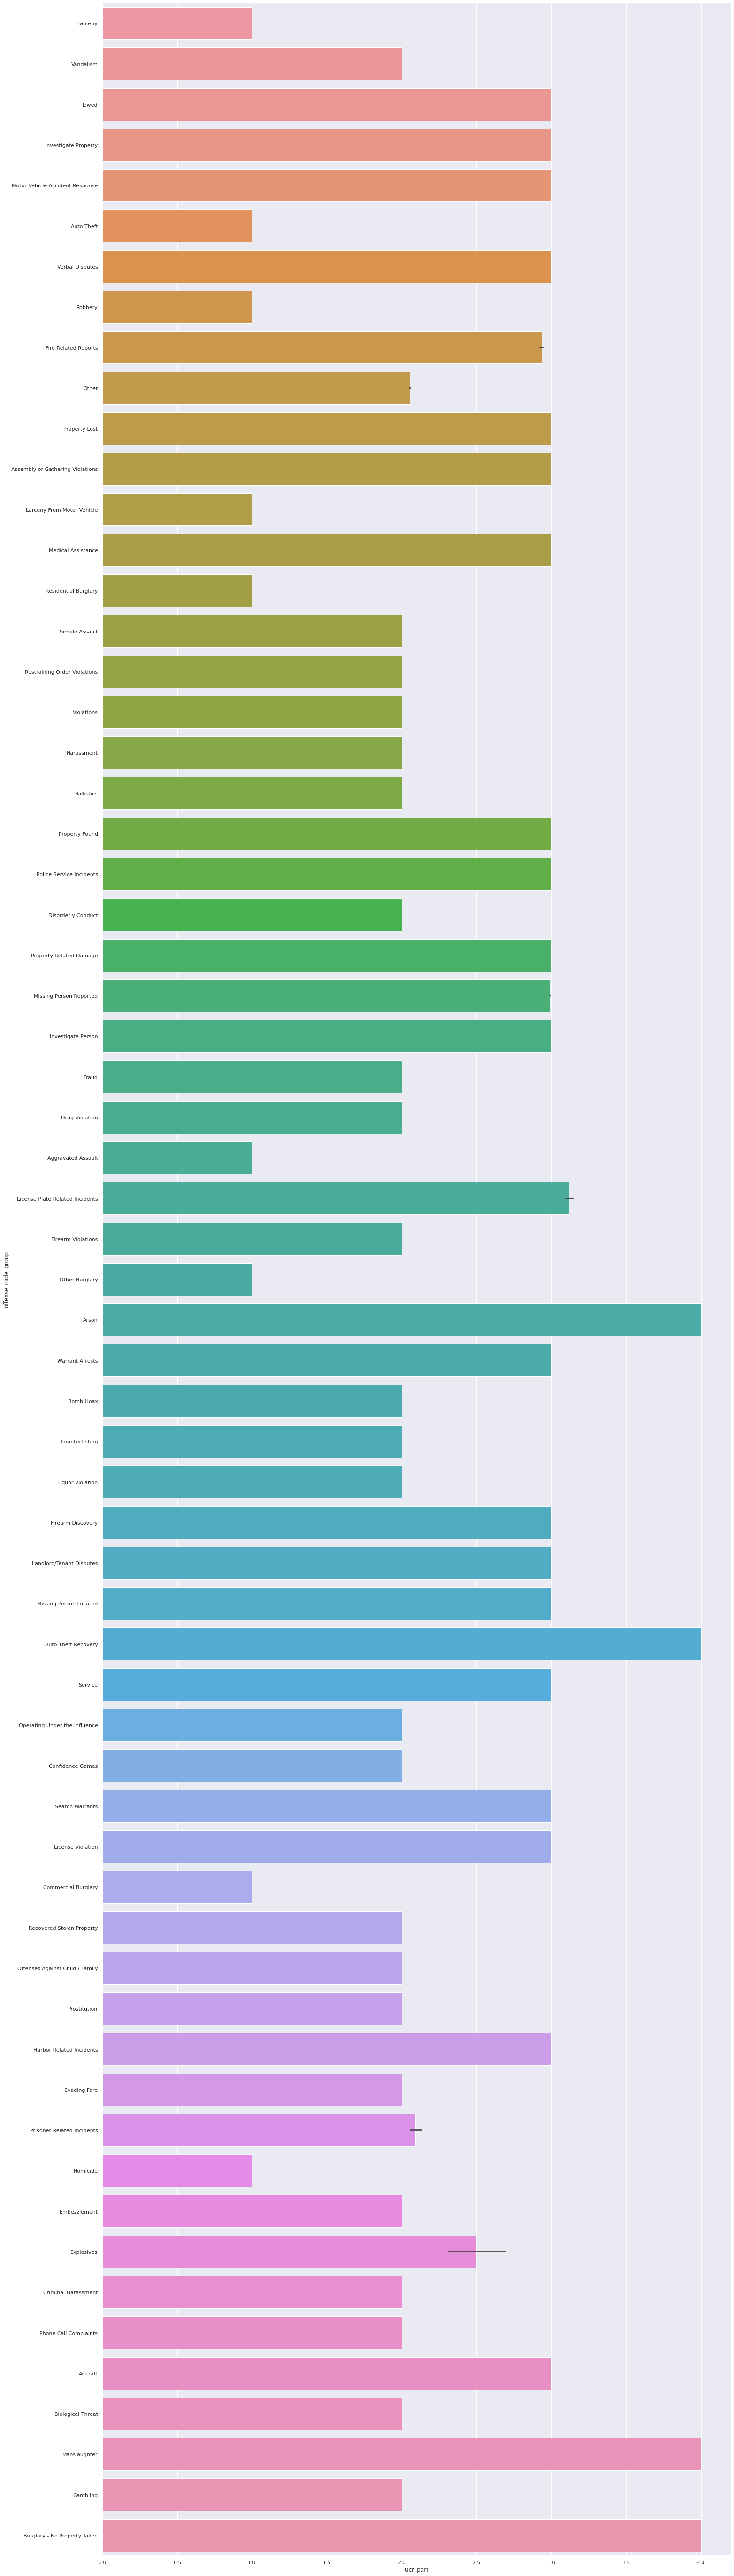

In [ ]:
import seaborn as sns
sns.set(rc= {'figure.figsize':(24,100)})            
sns.barplot(x="ucr_part",y="offense_code_group", data = df)

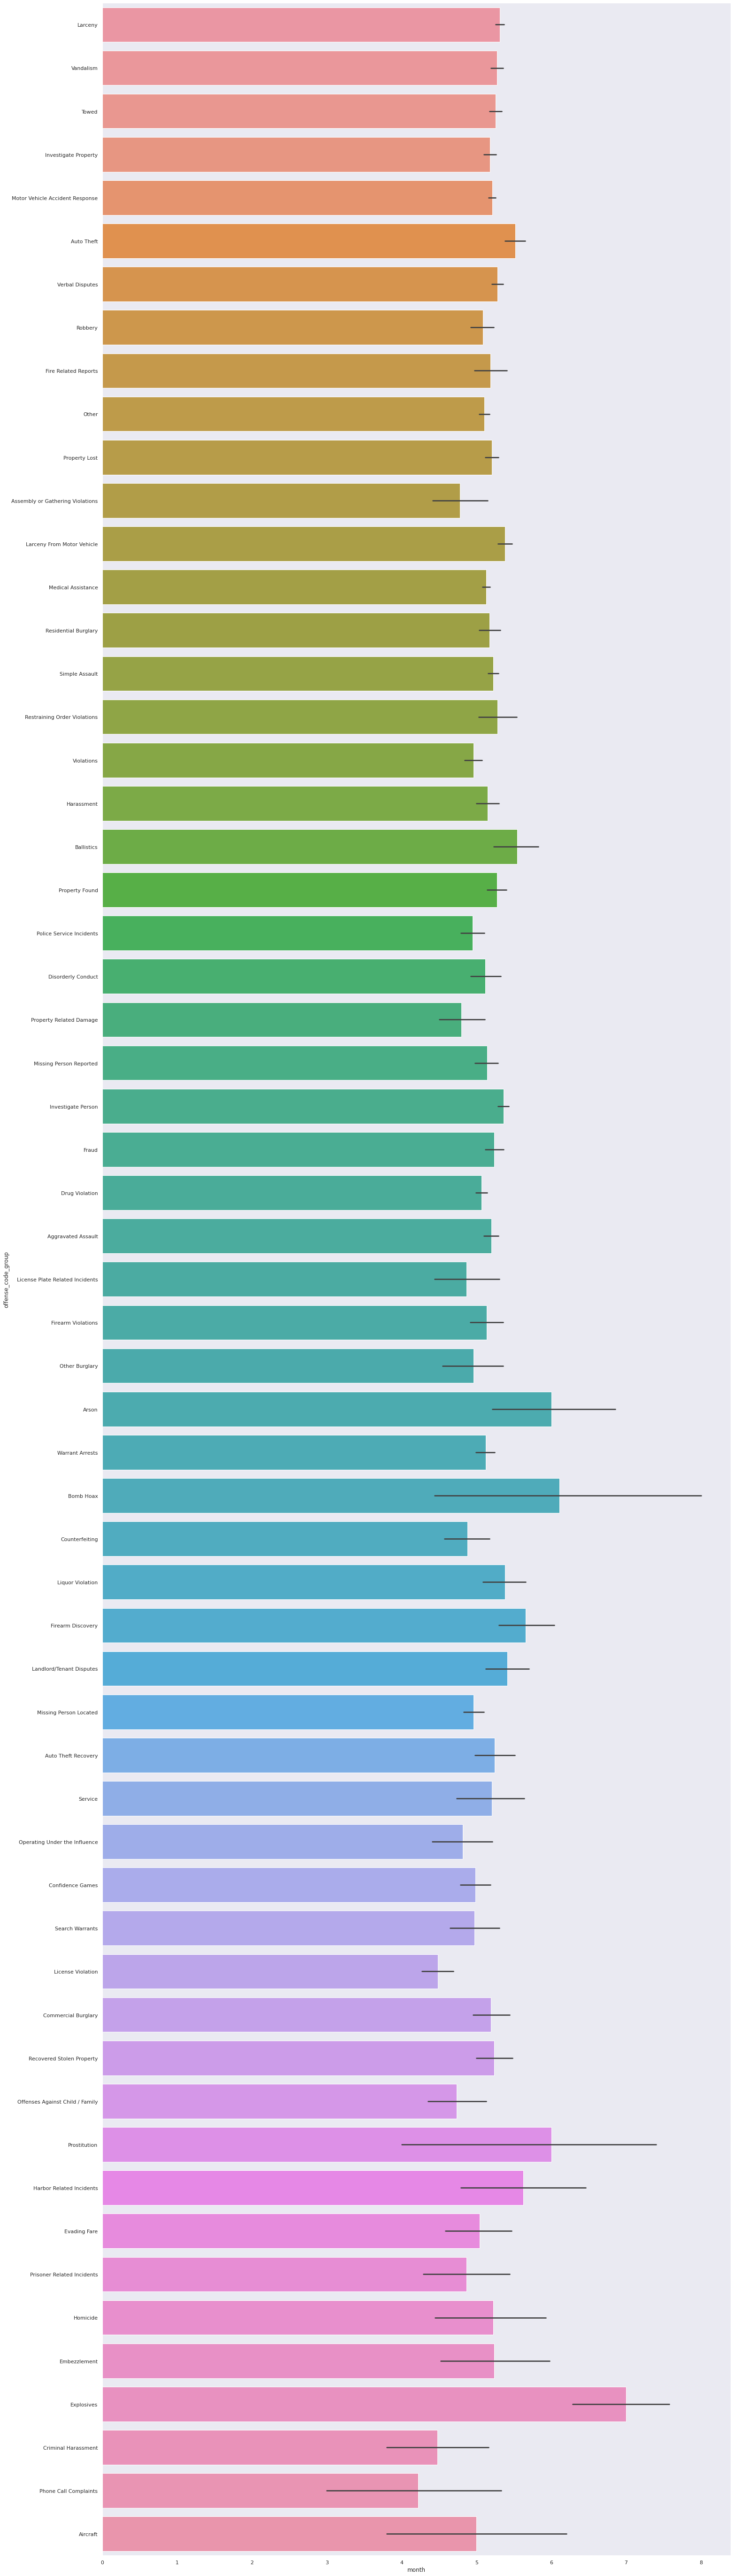

In [ ]:
sns.set(rc= {'figure.figsize':(24,100)})
sns.set_theme(style="dark")
sns.barplot(x='month',y='offense_code_group', data=df)

#### Line Graph

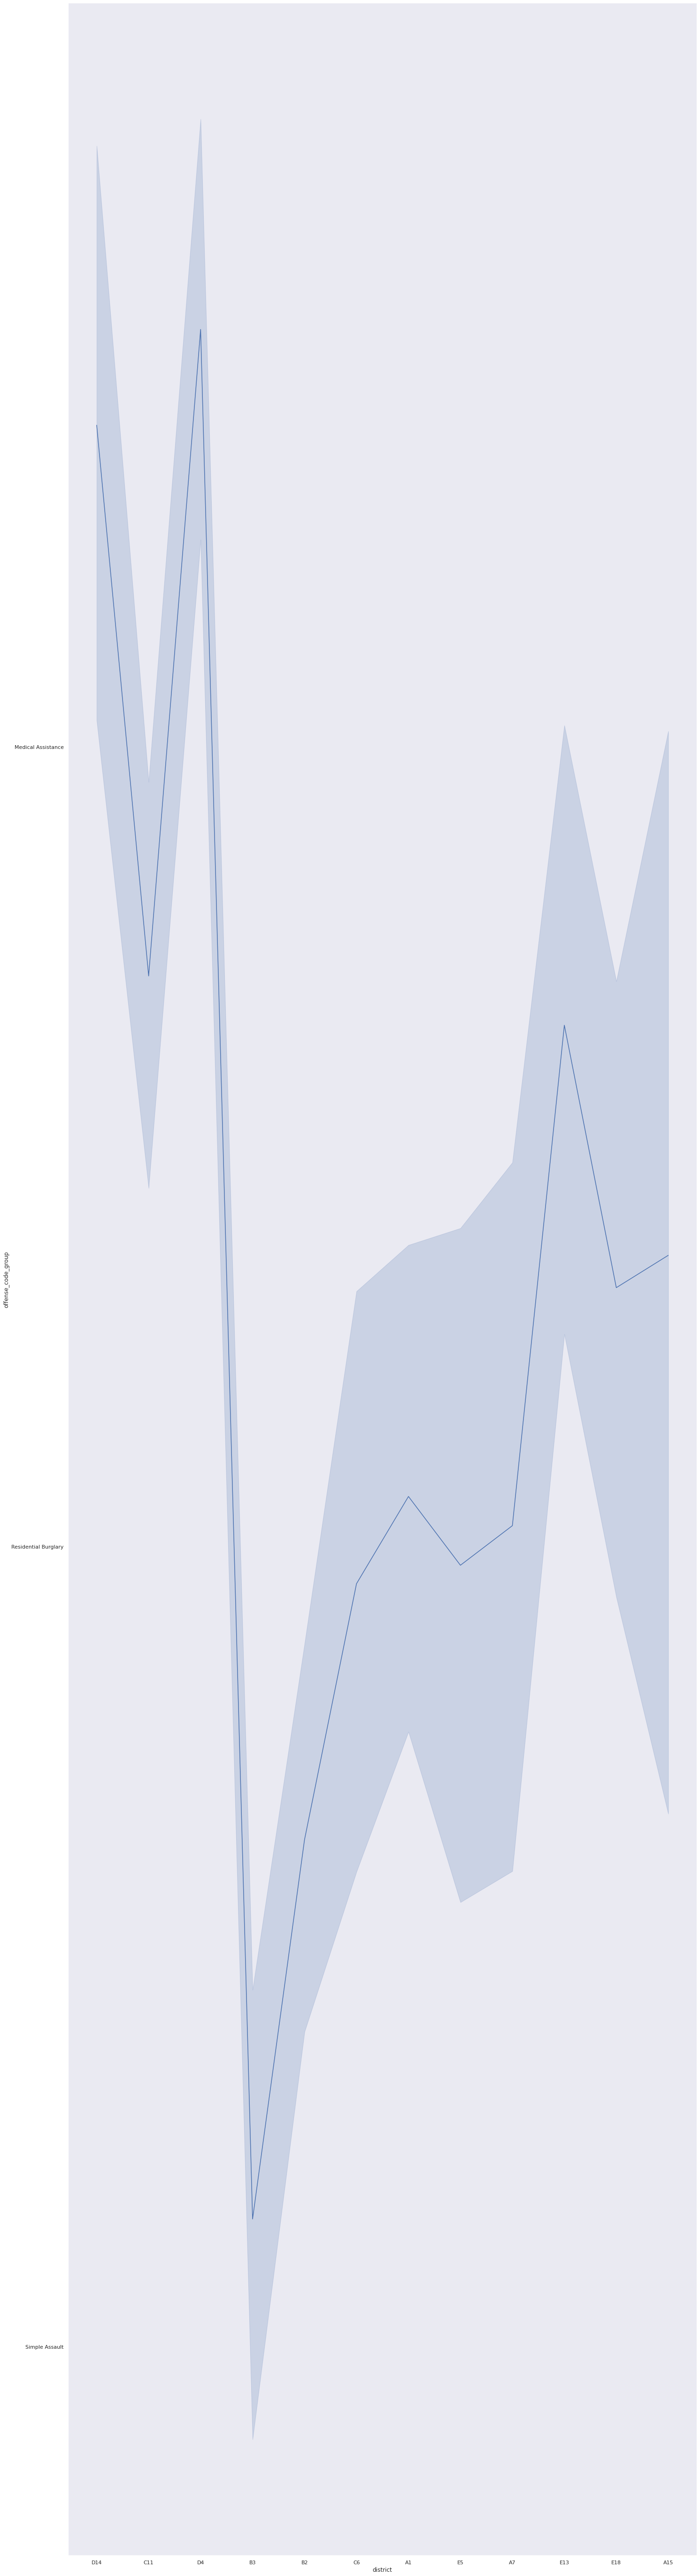

In [ ]:
sns.lineplot(y='offense_code_group',x='district',data= df)
#pd.melt(df, ['offense_code'])

#### Boxen Plots
Chosen over a boxplot due to the size of the data base 

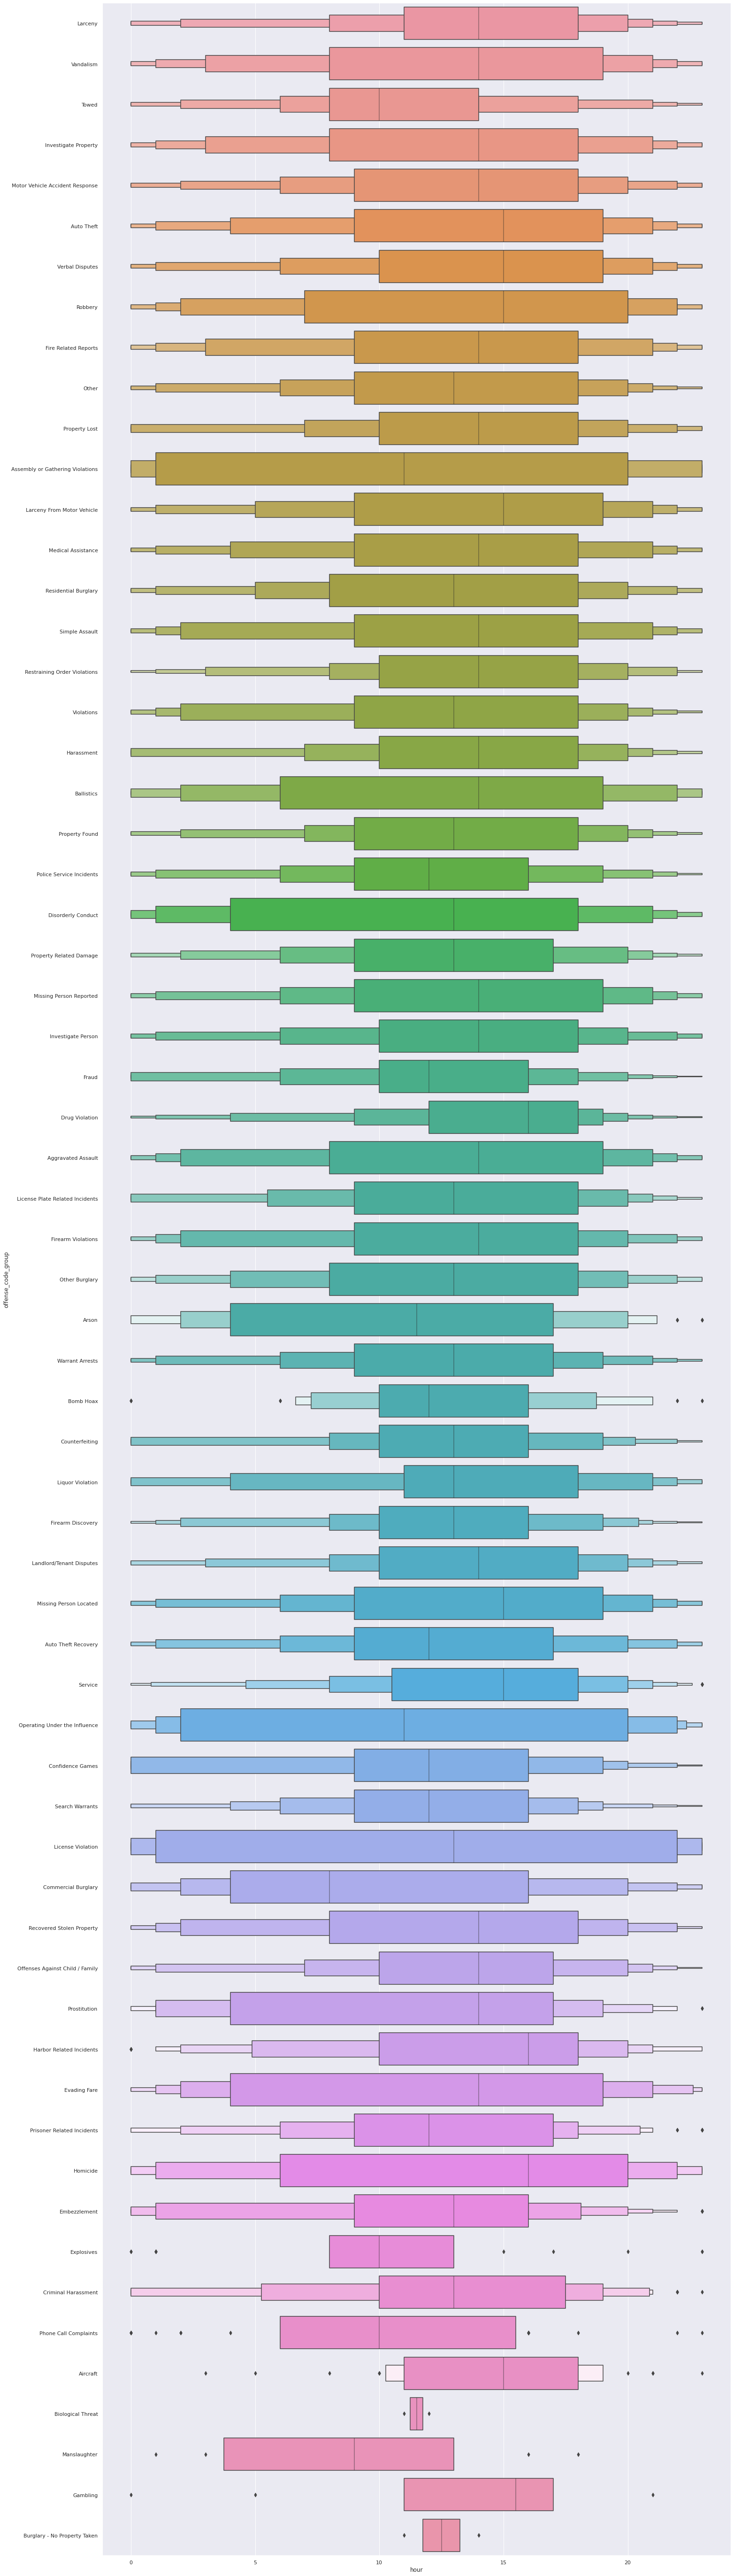

In [ ]:
sns.boxenplot(y='offense_code_group',x='hour',data= df)

#### Count Plots

Crimes Per District

Text(0.5, 1.0, 'Count of Total Crimes Per District')

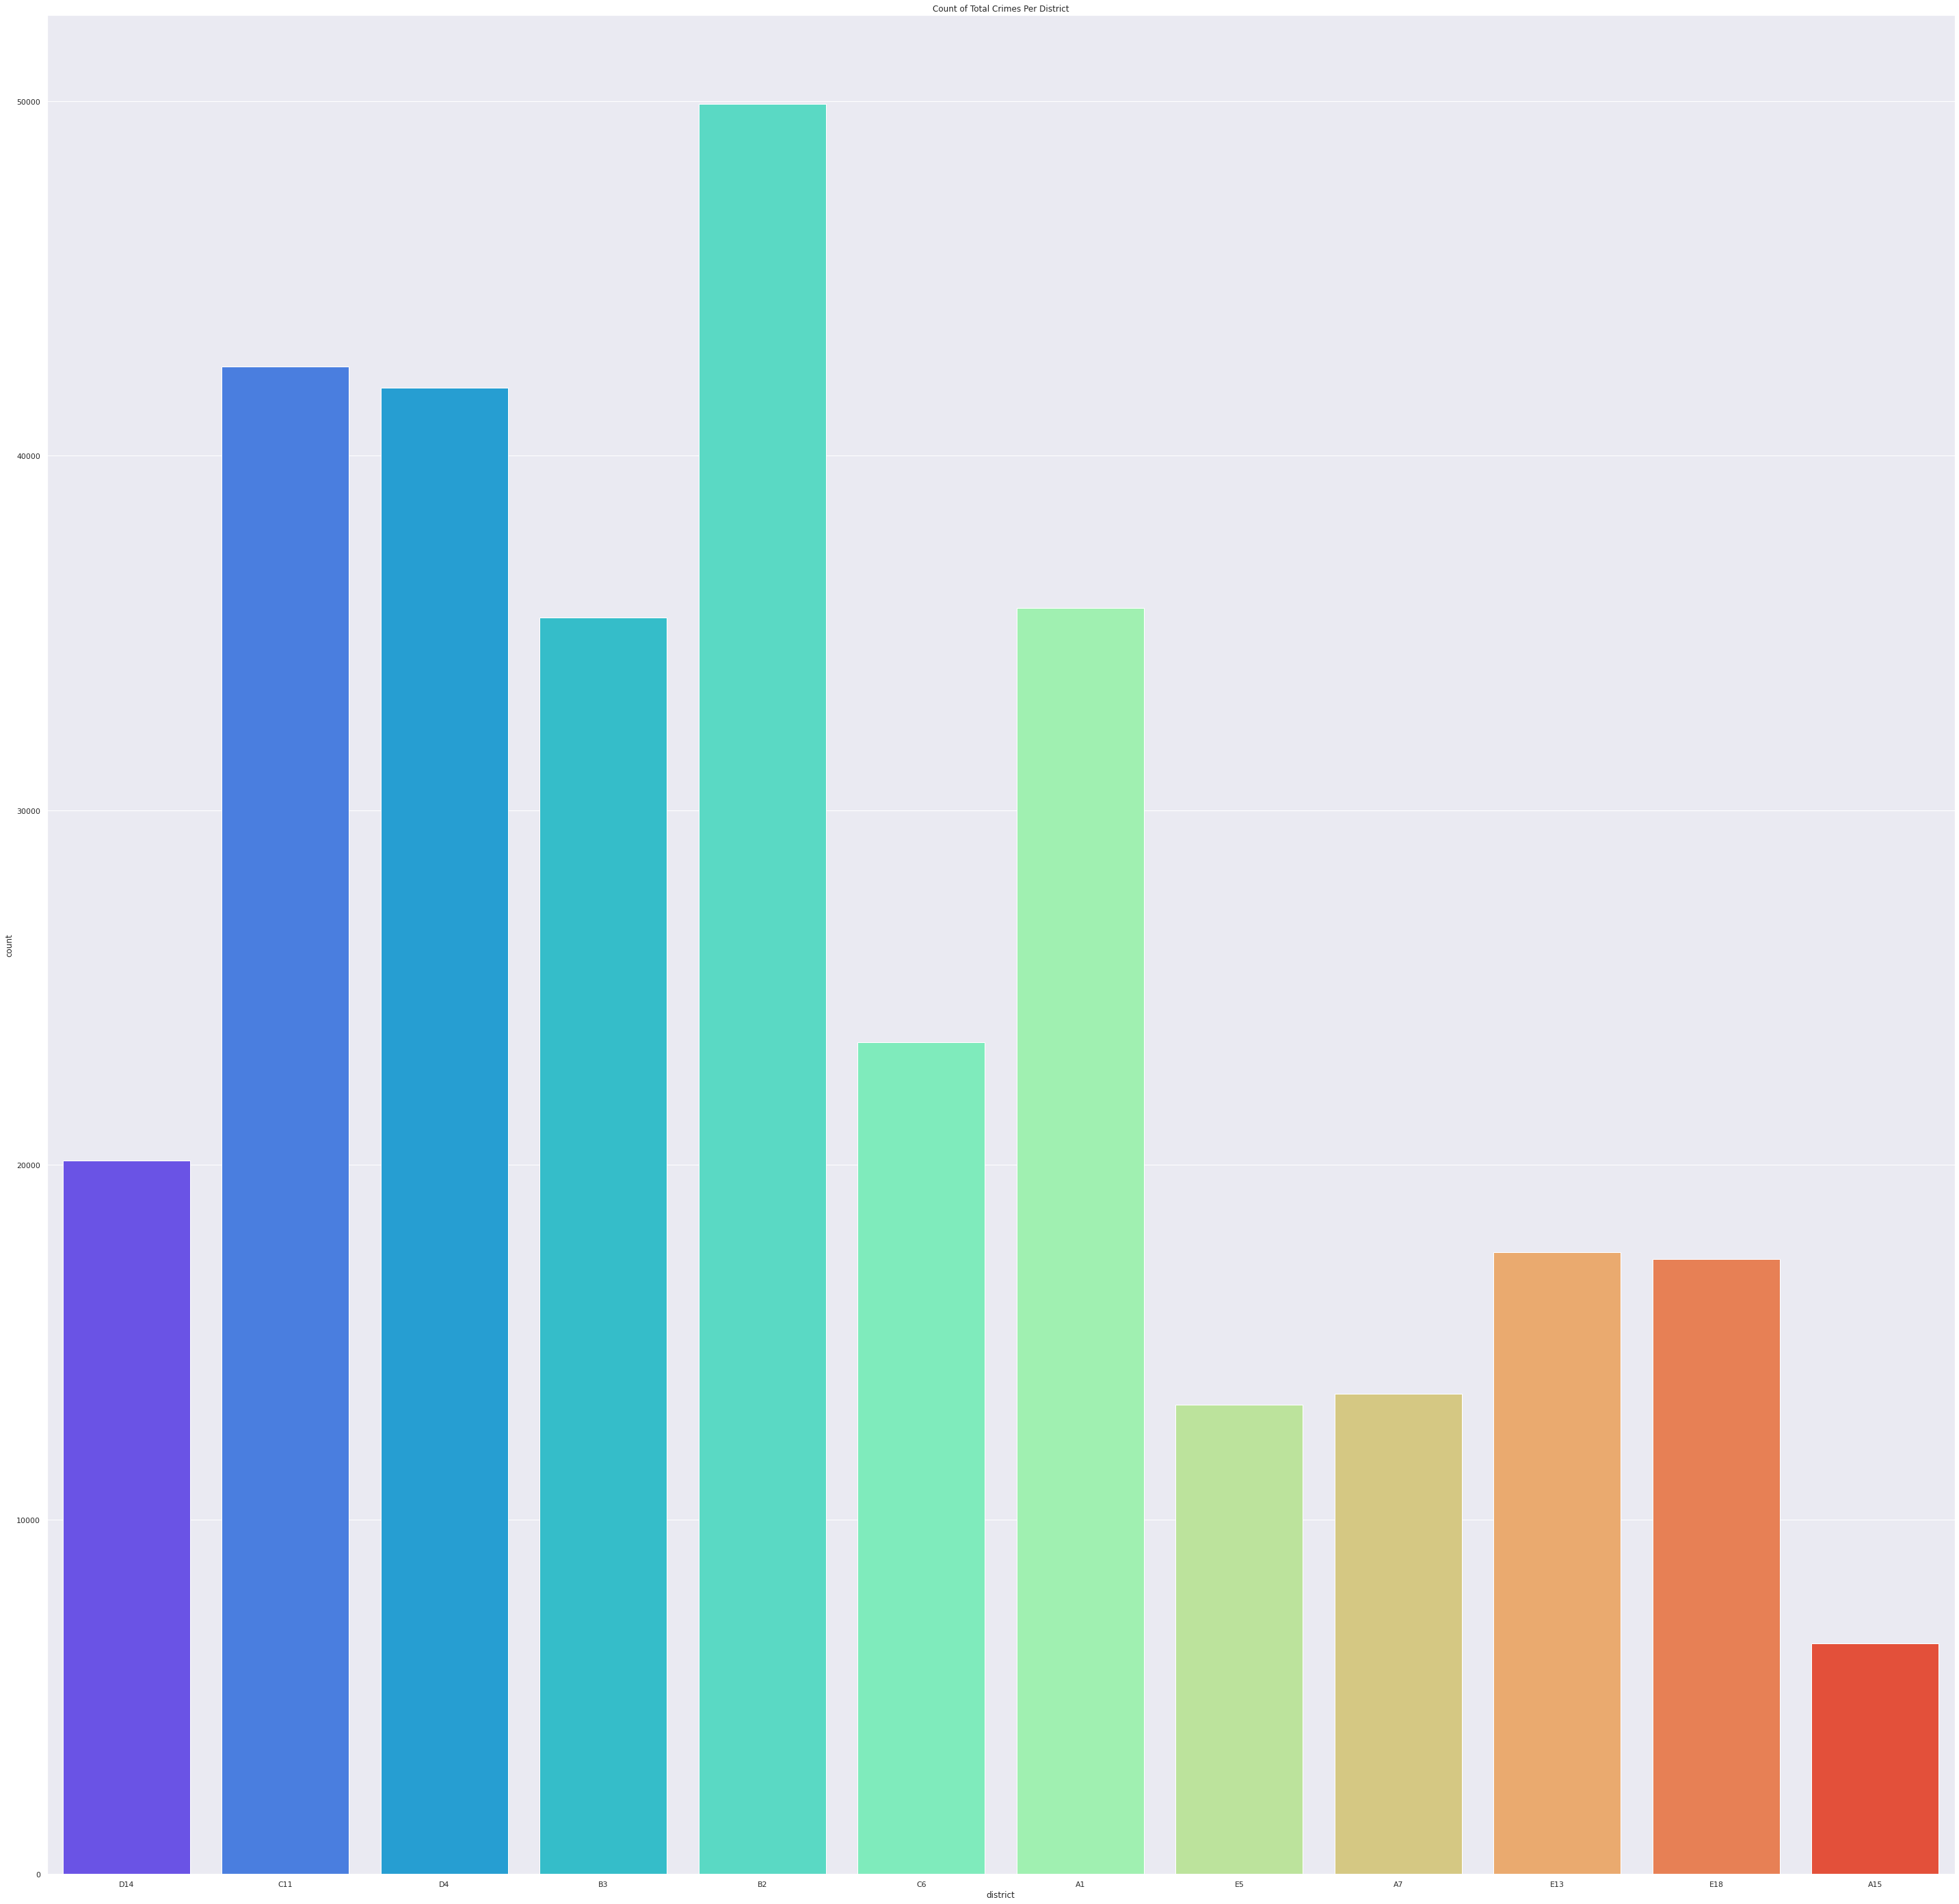

In [ ]:
plt.figure(figsize=(50,50))
sns.countplot(x='district', data=df, palette='rainbow')
plt.title("Count of Total Crimes Per District")

Crimes per Year

Text(0.5, 1.0, 'Count of Total Crimes Per Year')

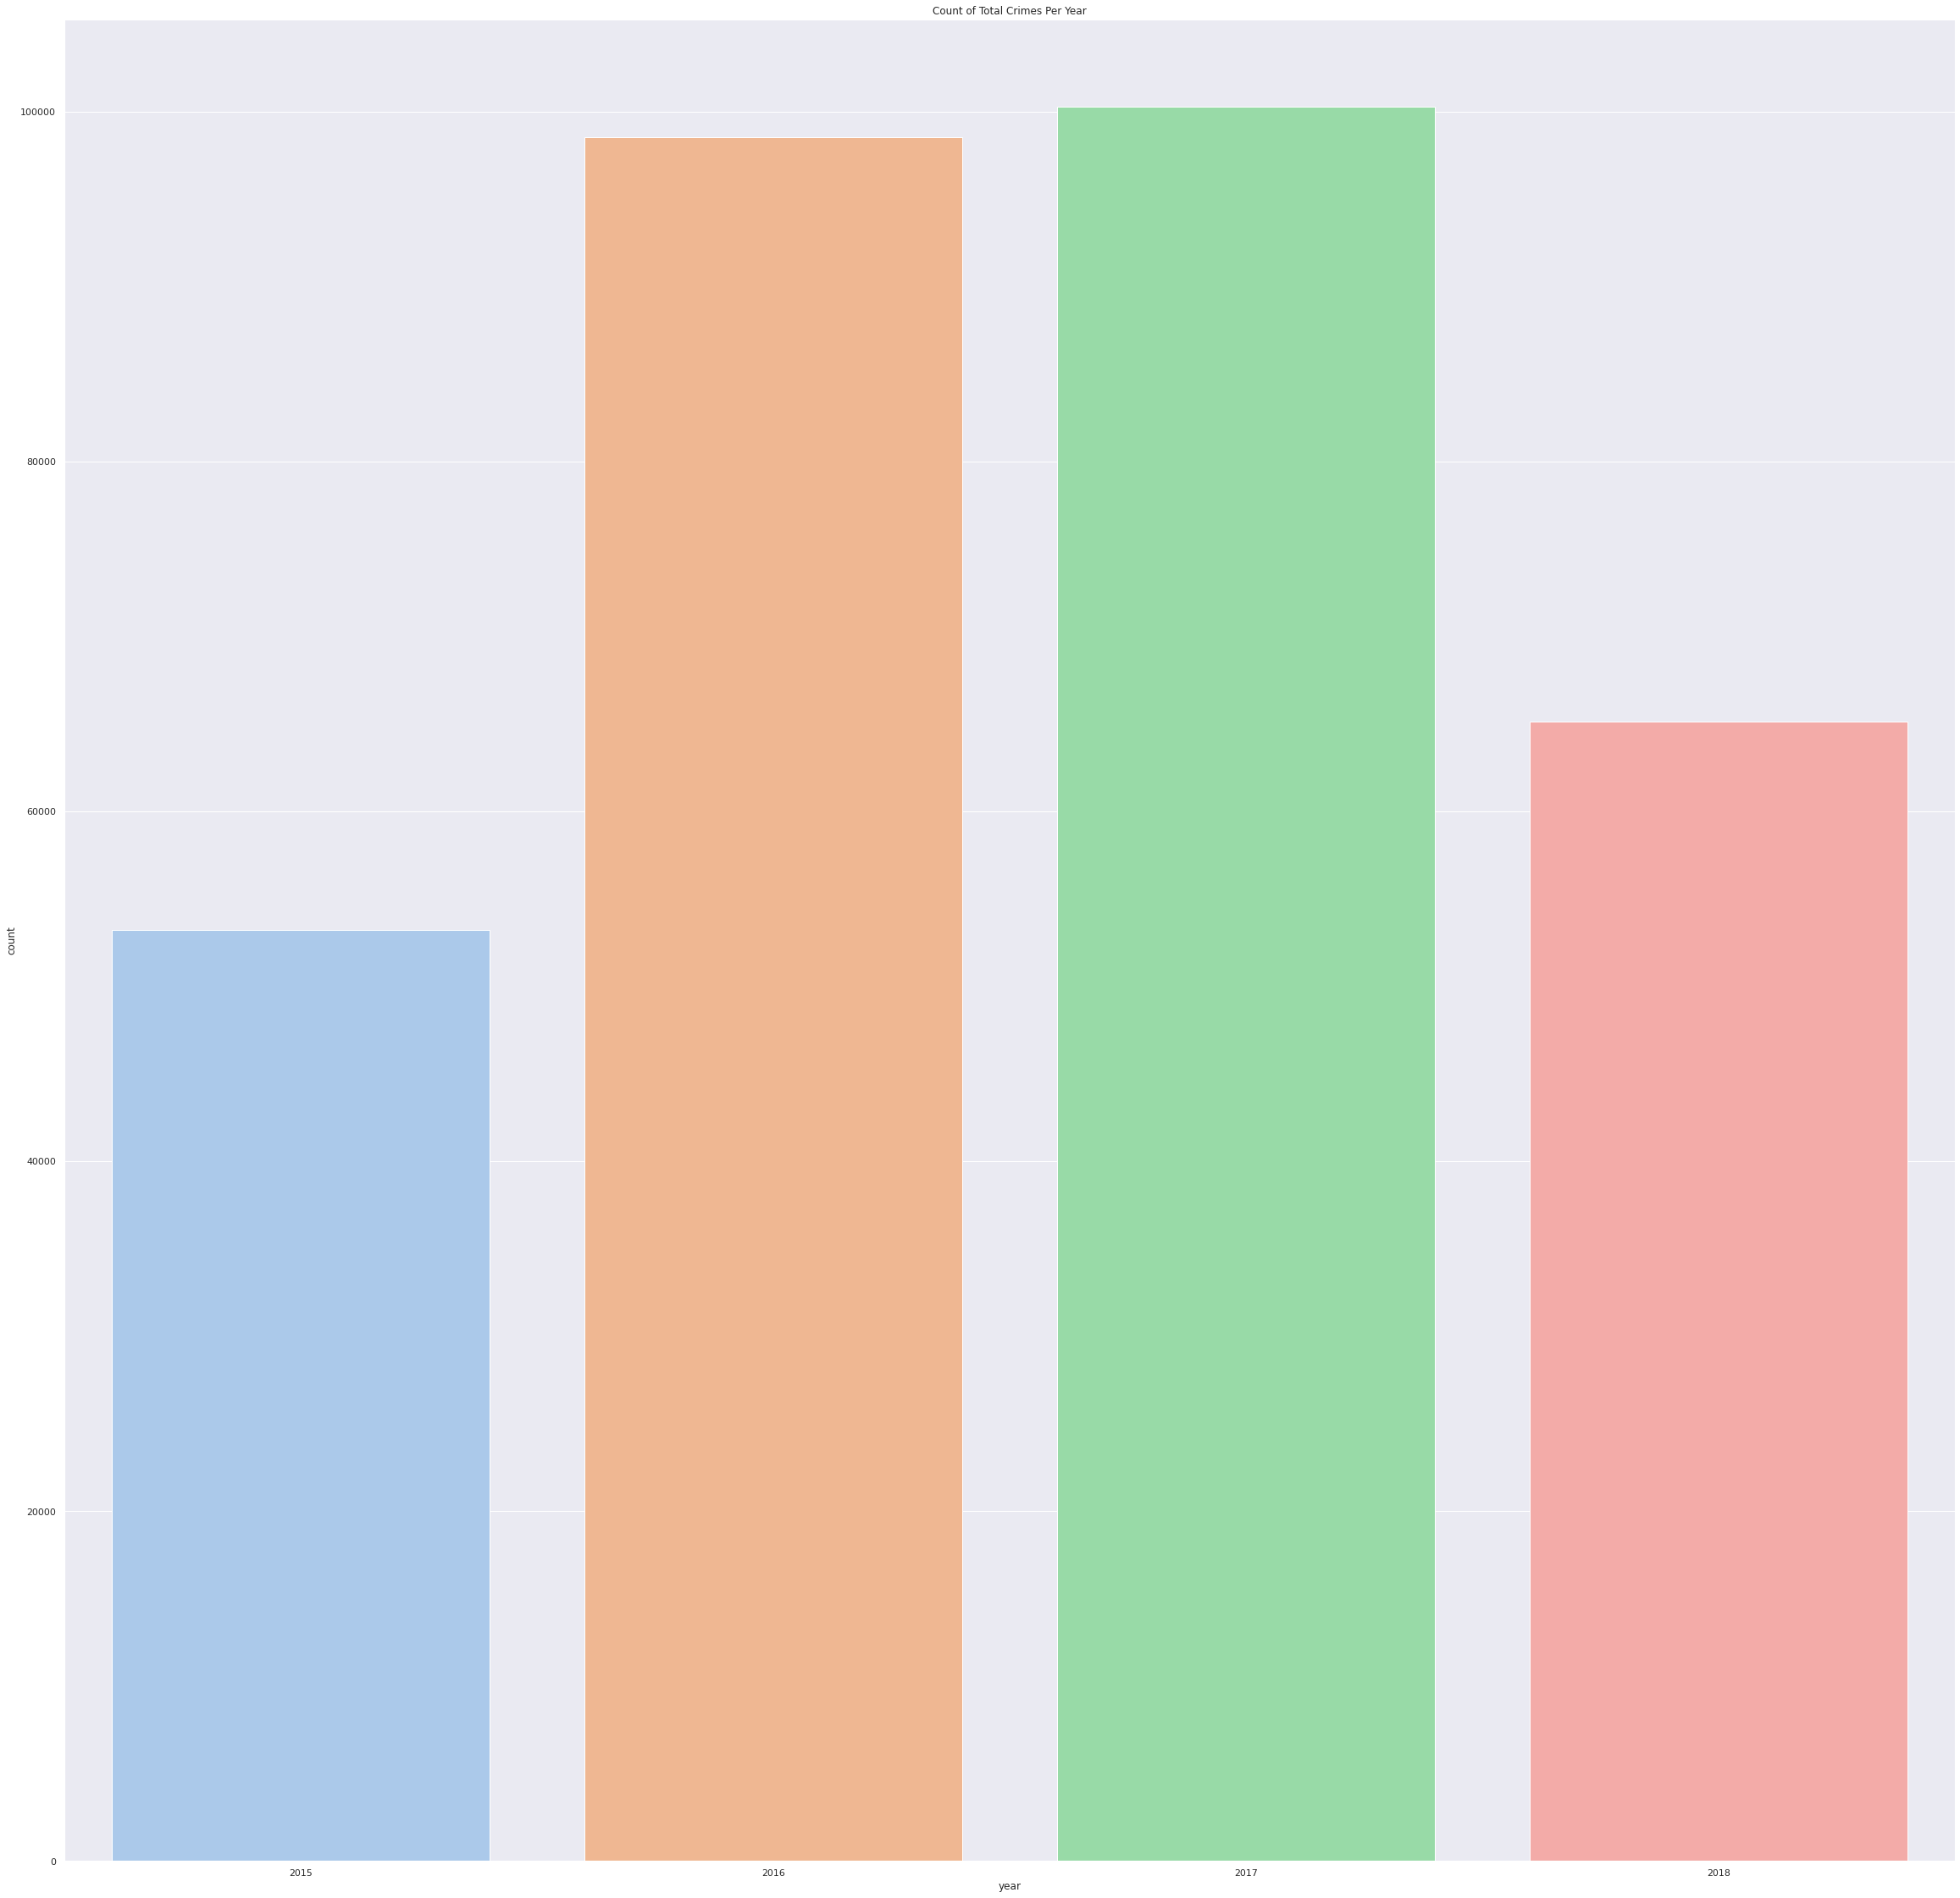

In [ ]:
plt.figure(figsize=(40,40))
sns.countplot(x='year', data=df, palette='pastel')
plt.title("Count of Total Crimes Per Year")

Crimes Per Hour

Text(0.5, 1.0, 'Count of Total Crimes Per Hour')

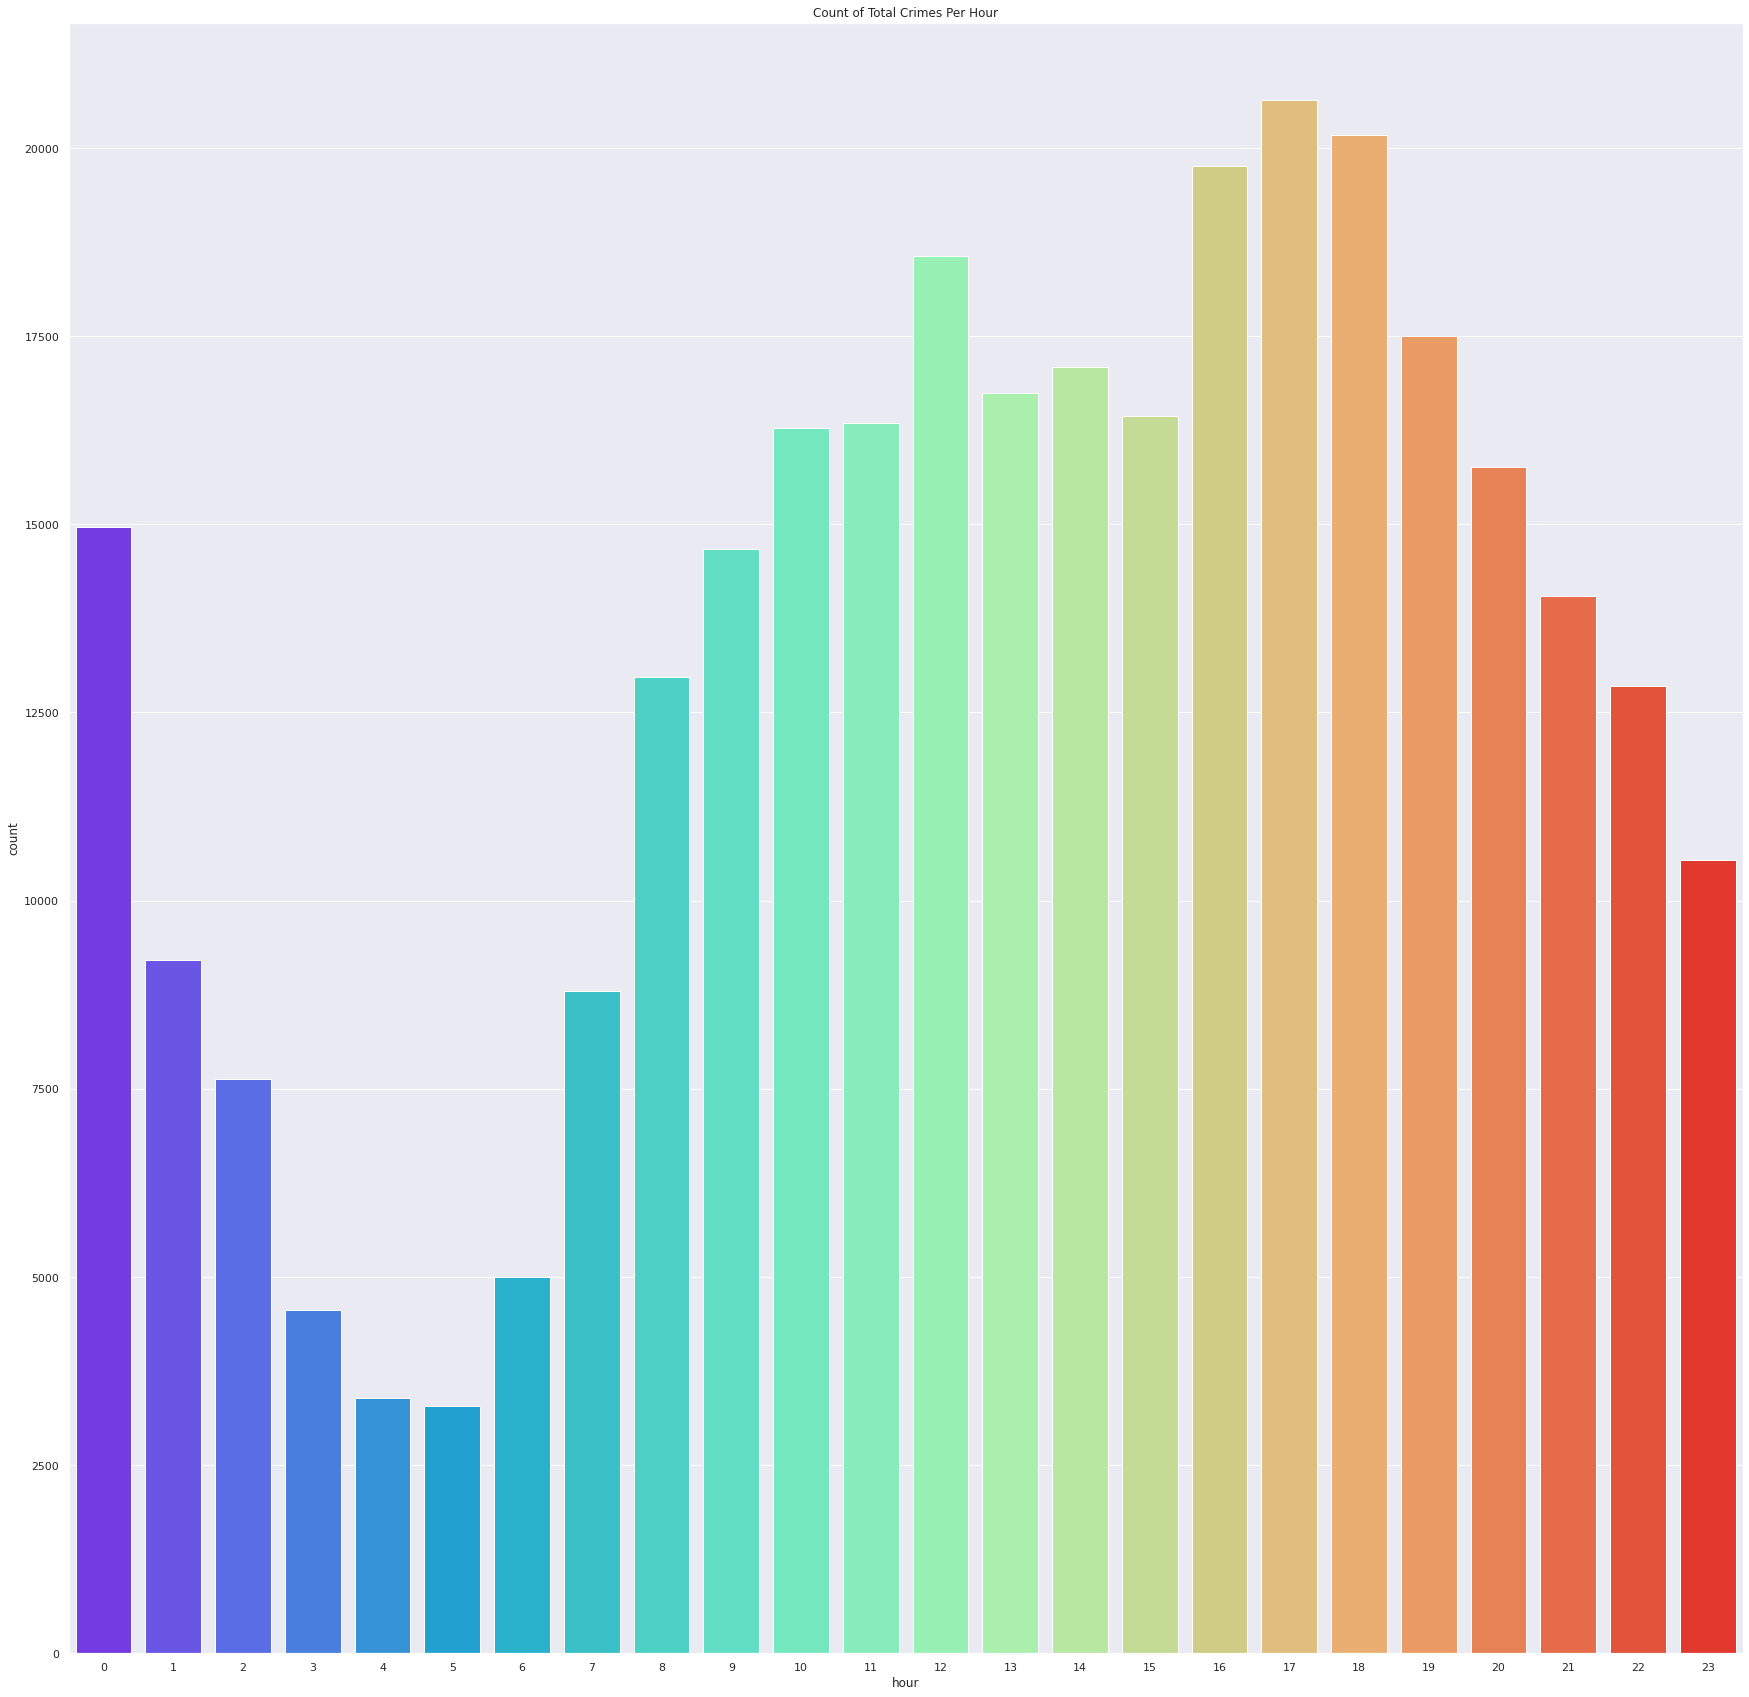

In [ ]:
plt.figure(figsize=(30,30))
sns.countplot(x='hour', data=df, palette='rainbow')
plt.title("Count of Total Crimes Per Hour")

Crimes per Month

Text(0.5, 1.0, 'Count of Total Crimes Per Month')

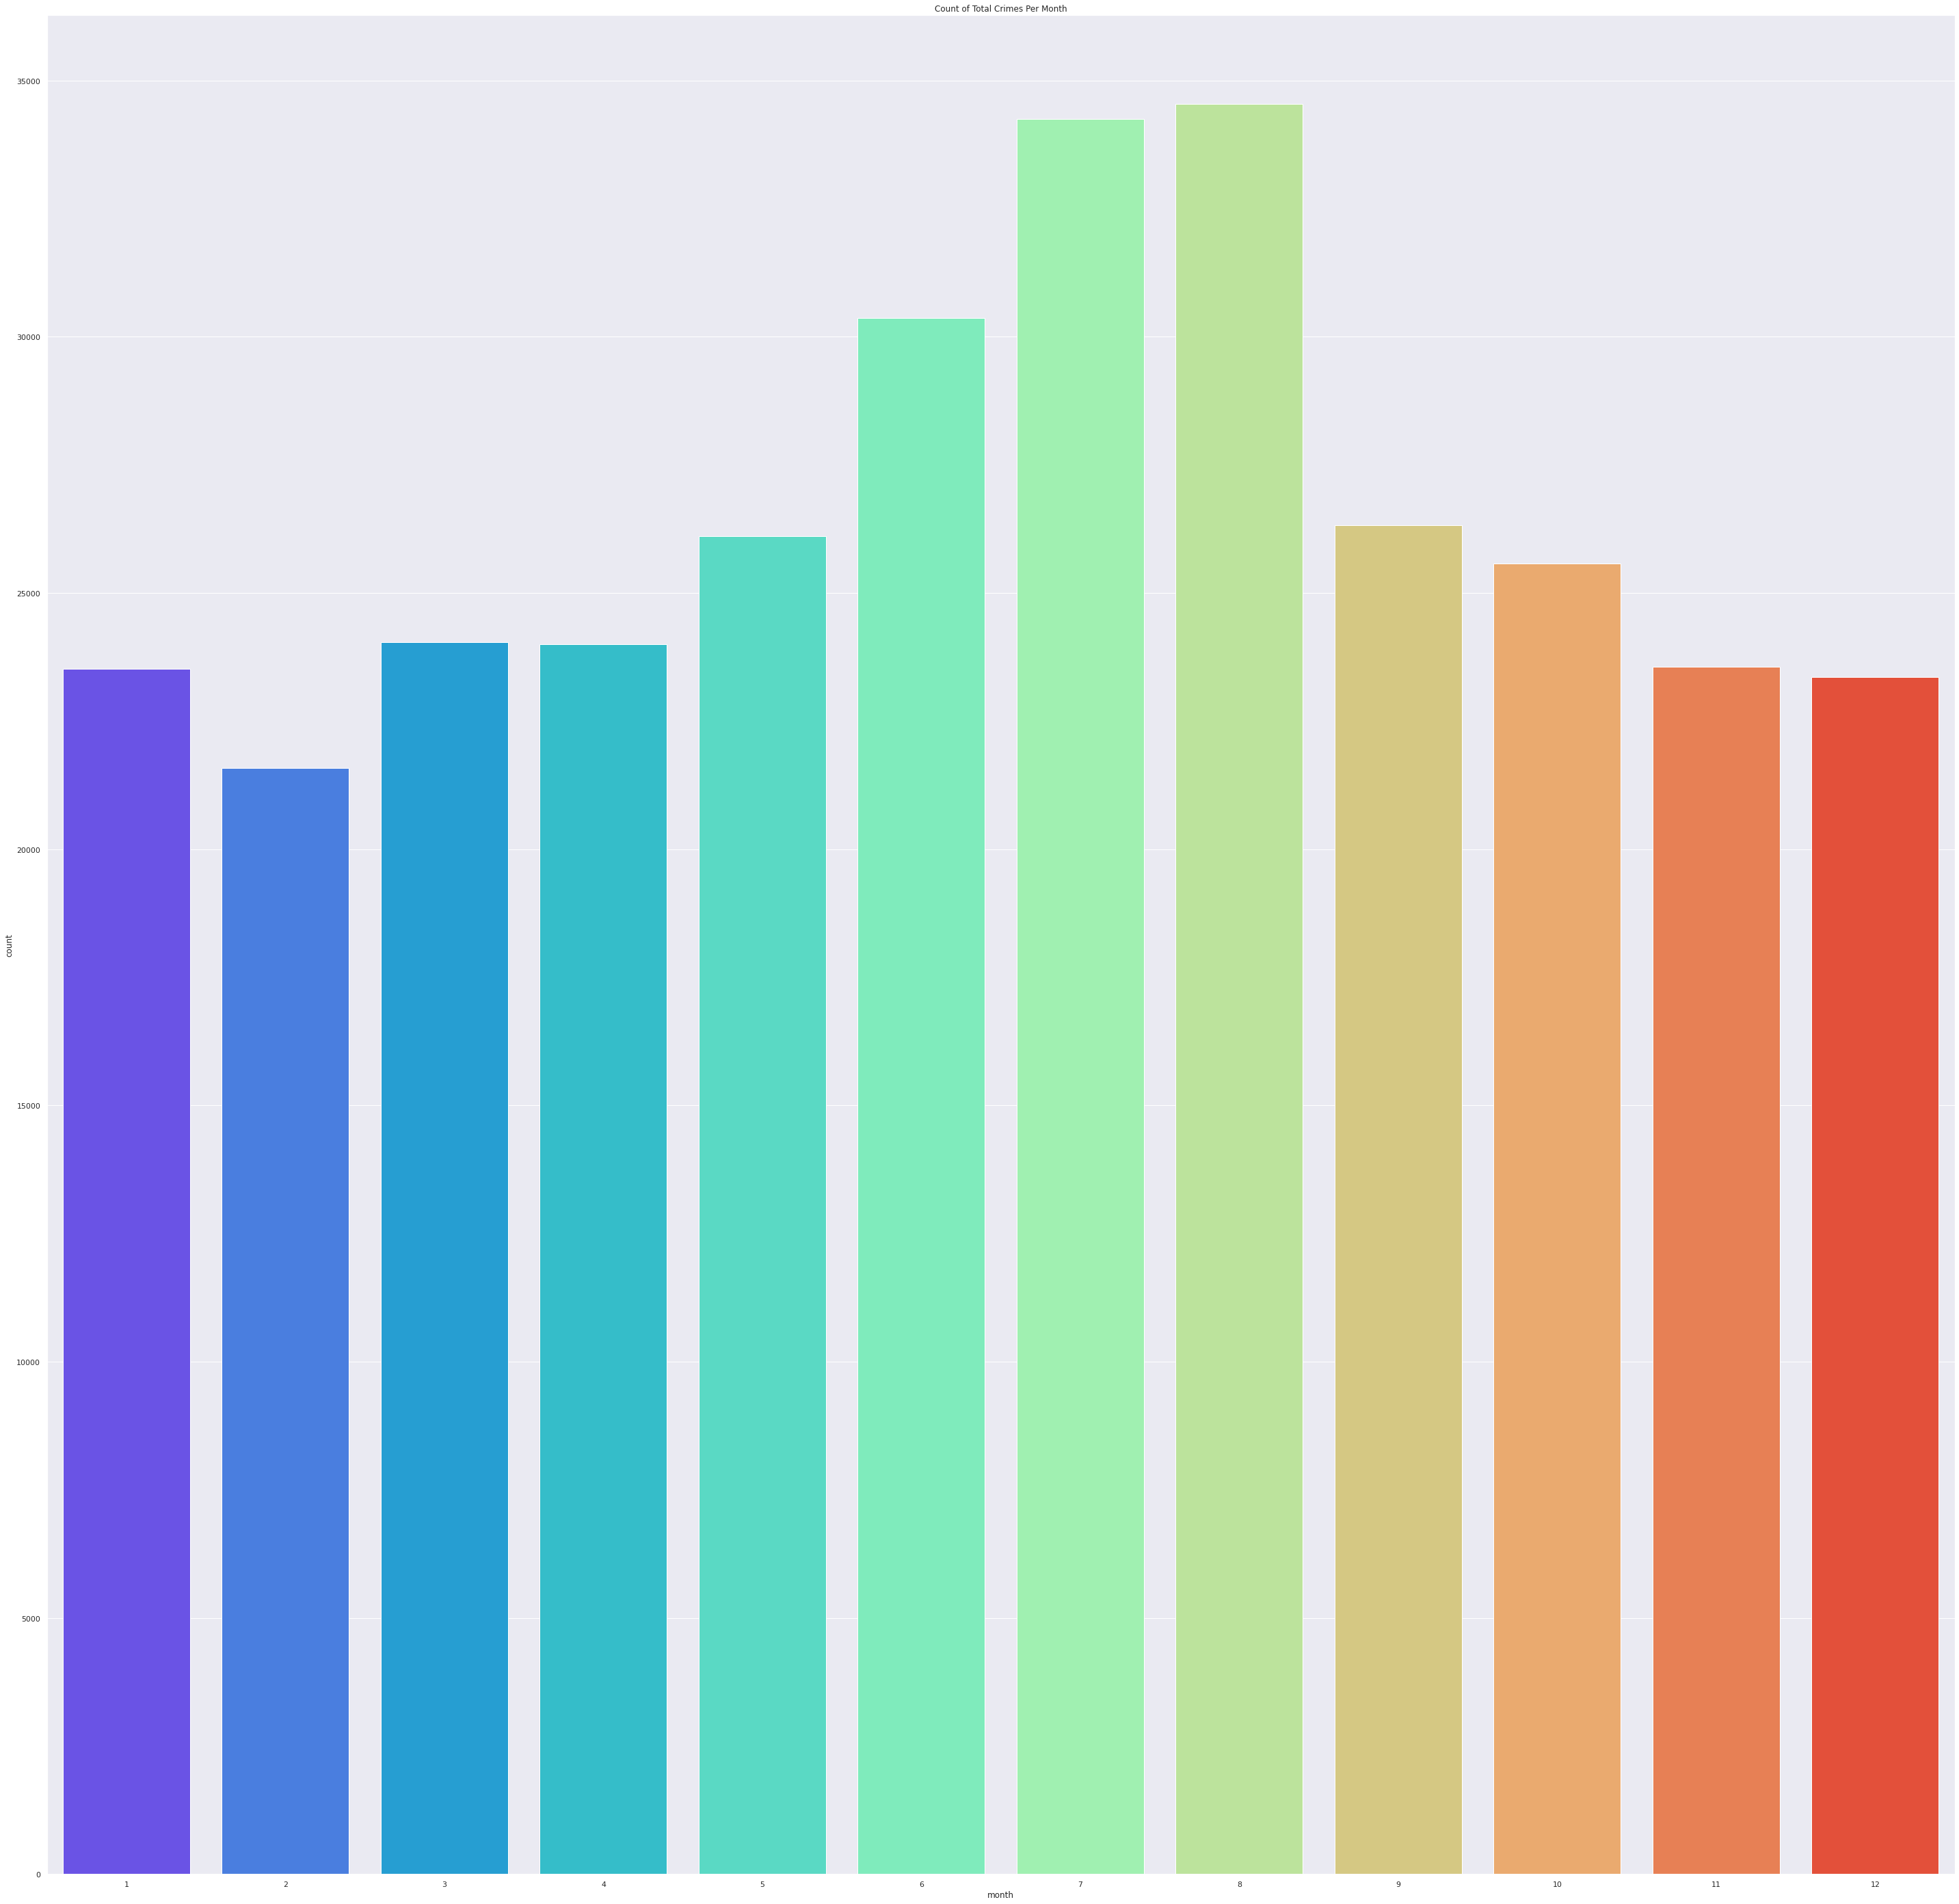

In [ ]:
plt.figure(figsize=(50,50))
sns.countplot(x='month', data=df, palette='rainbow')
plt.title("Count of Total Crimes Per Month")

Total crimes recorded per month arranged by day

Text(0.5, 1.0, 'Count of Total Crimes Per month divide For each day')

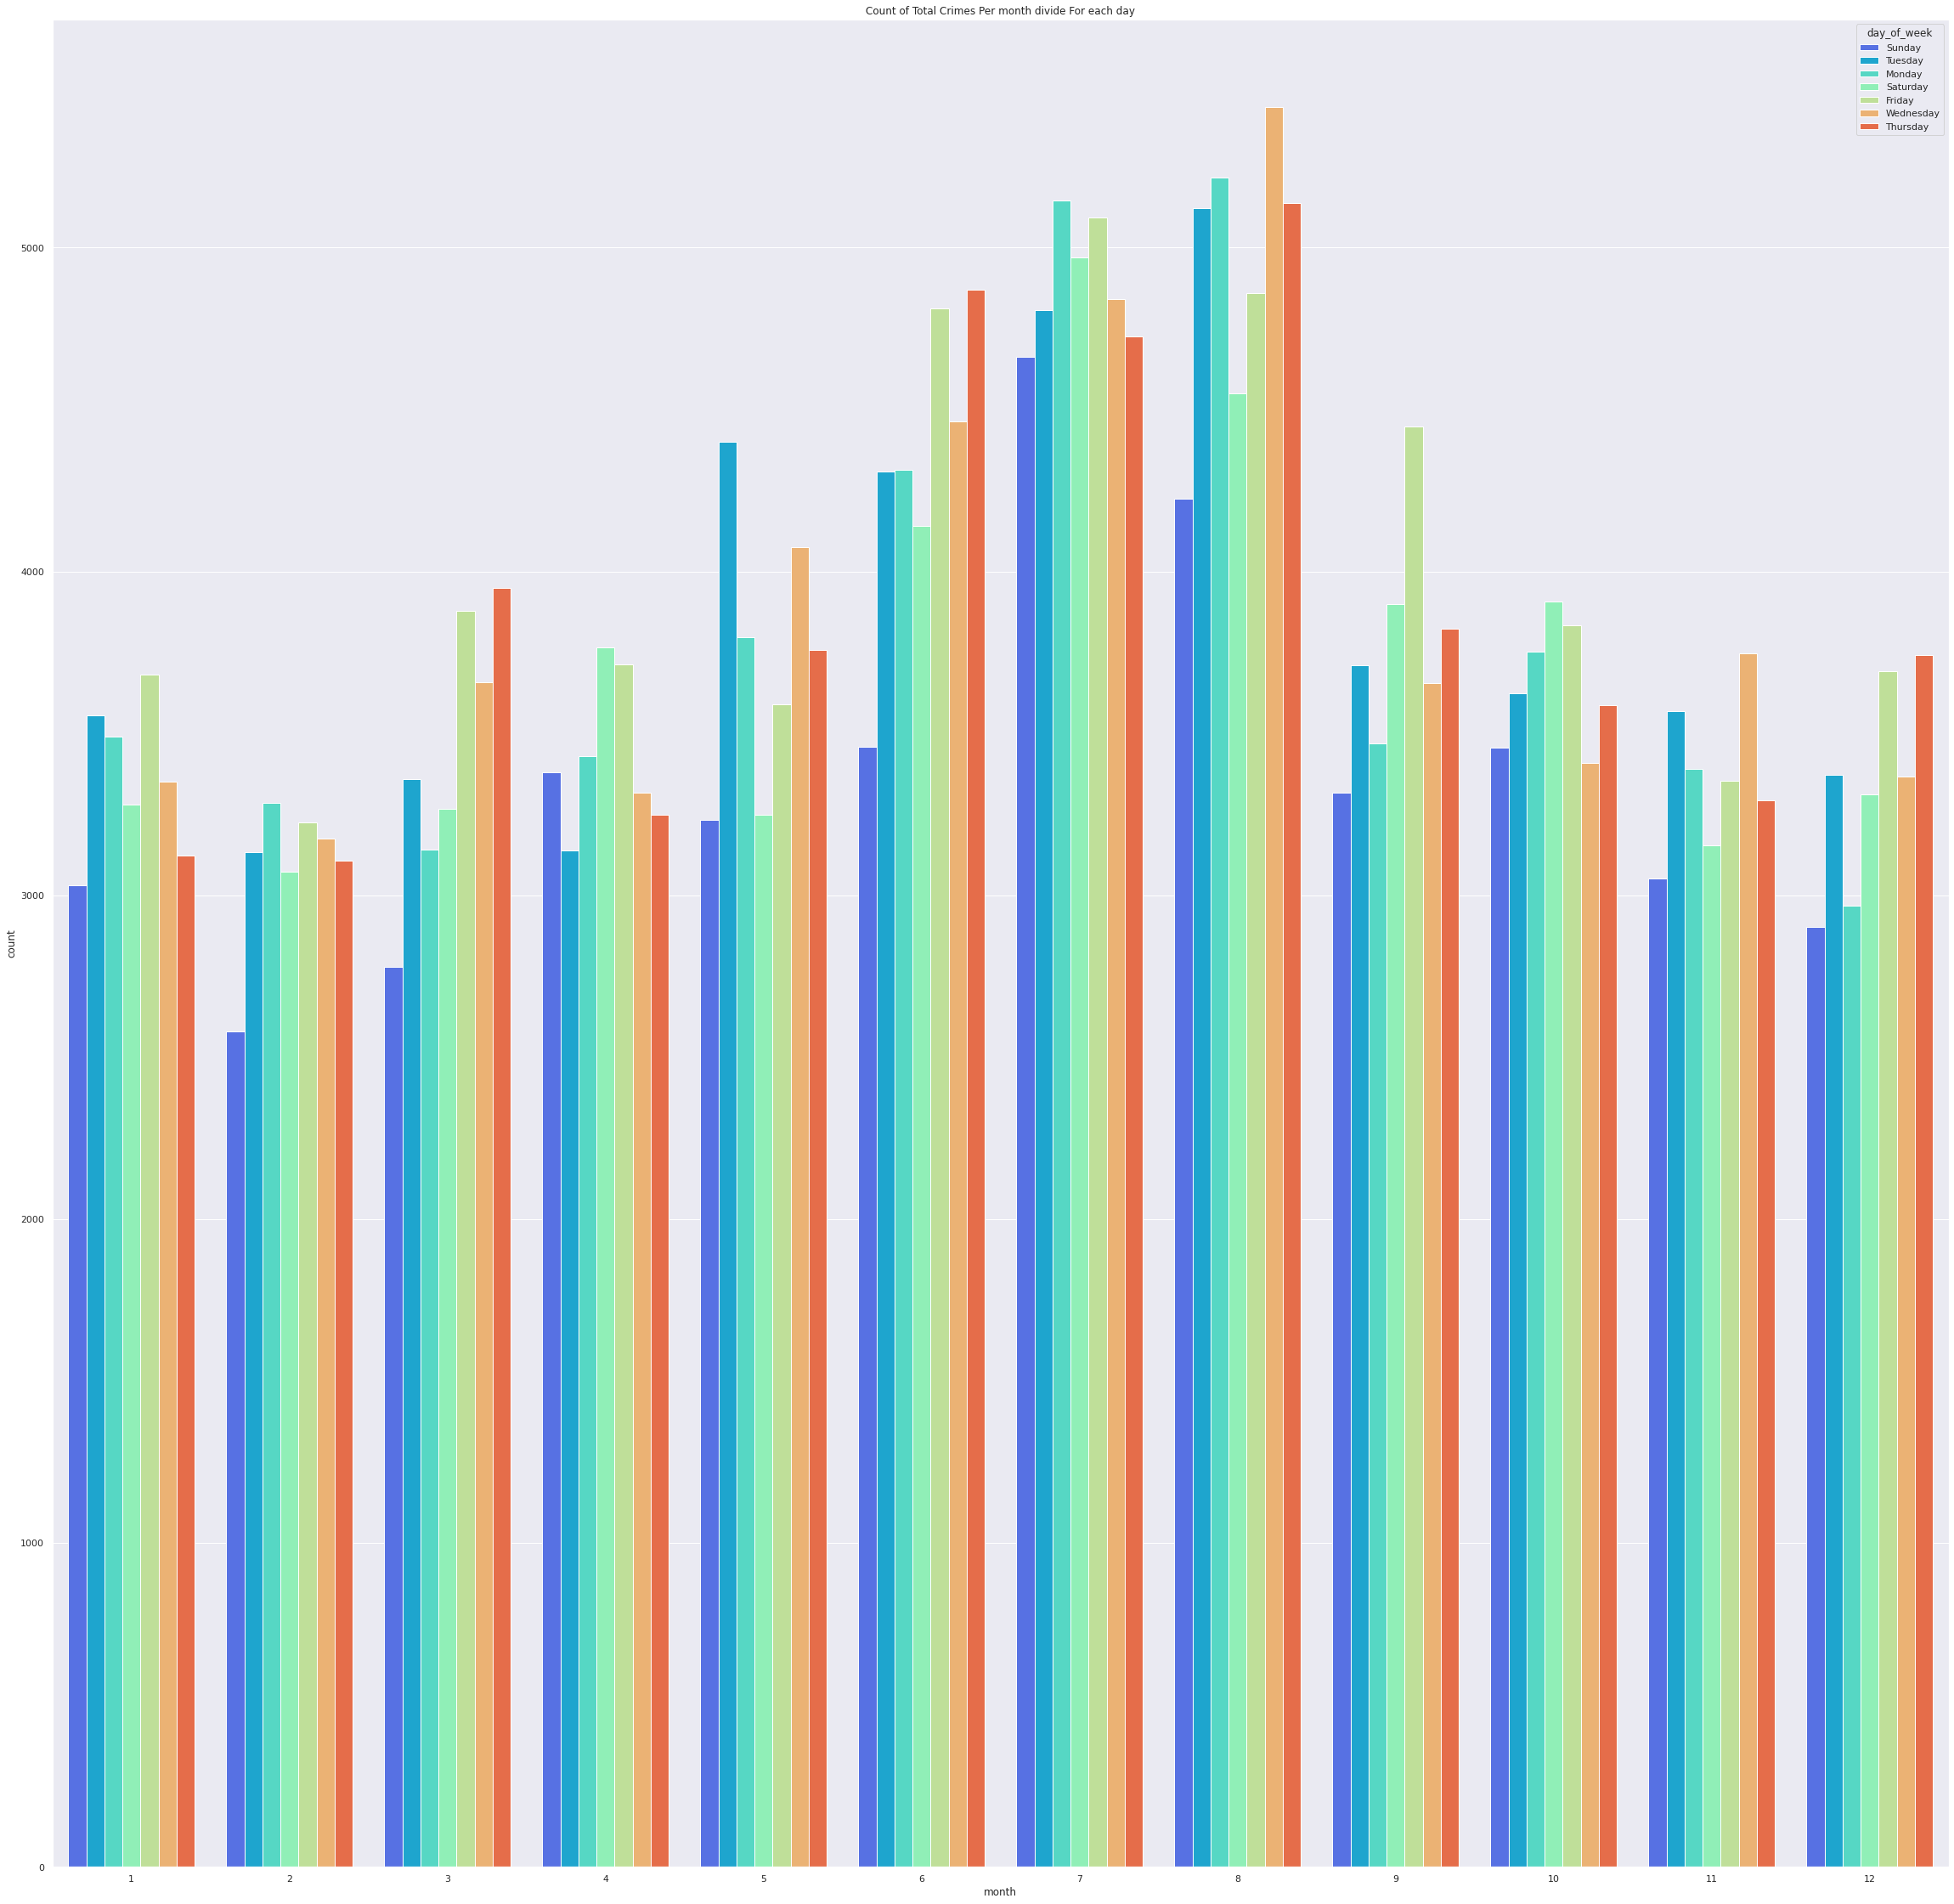

In [ ]:
plt.figure(figsize=(40,40))
sns.countplot(x='month', data=df, palette='rainbow', hue='day_of_week')
plt.title("Count of Total Crimes Per month divide For each day")

Total Crimes per year by each offense group

Text(0.5, 1.0, 'Count of Total Crimes Per year divide For each offense group')

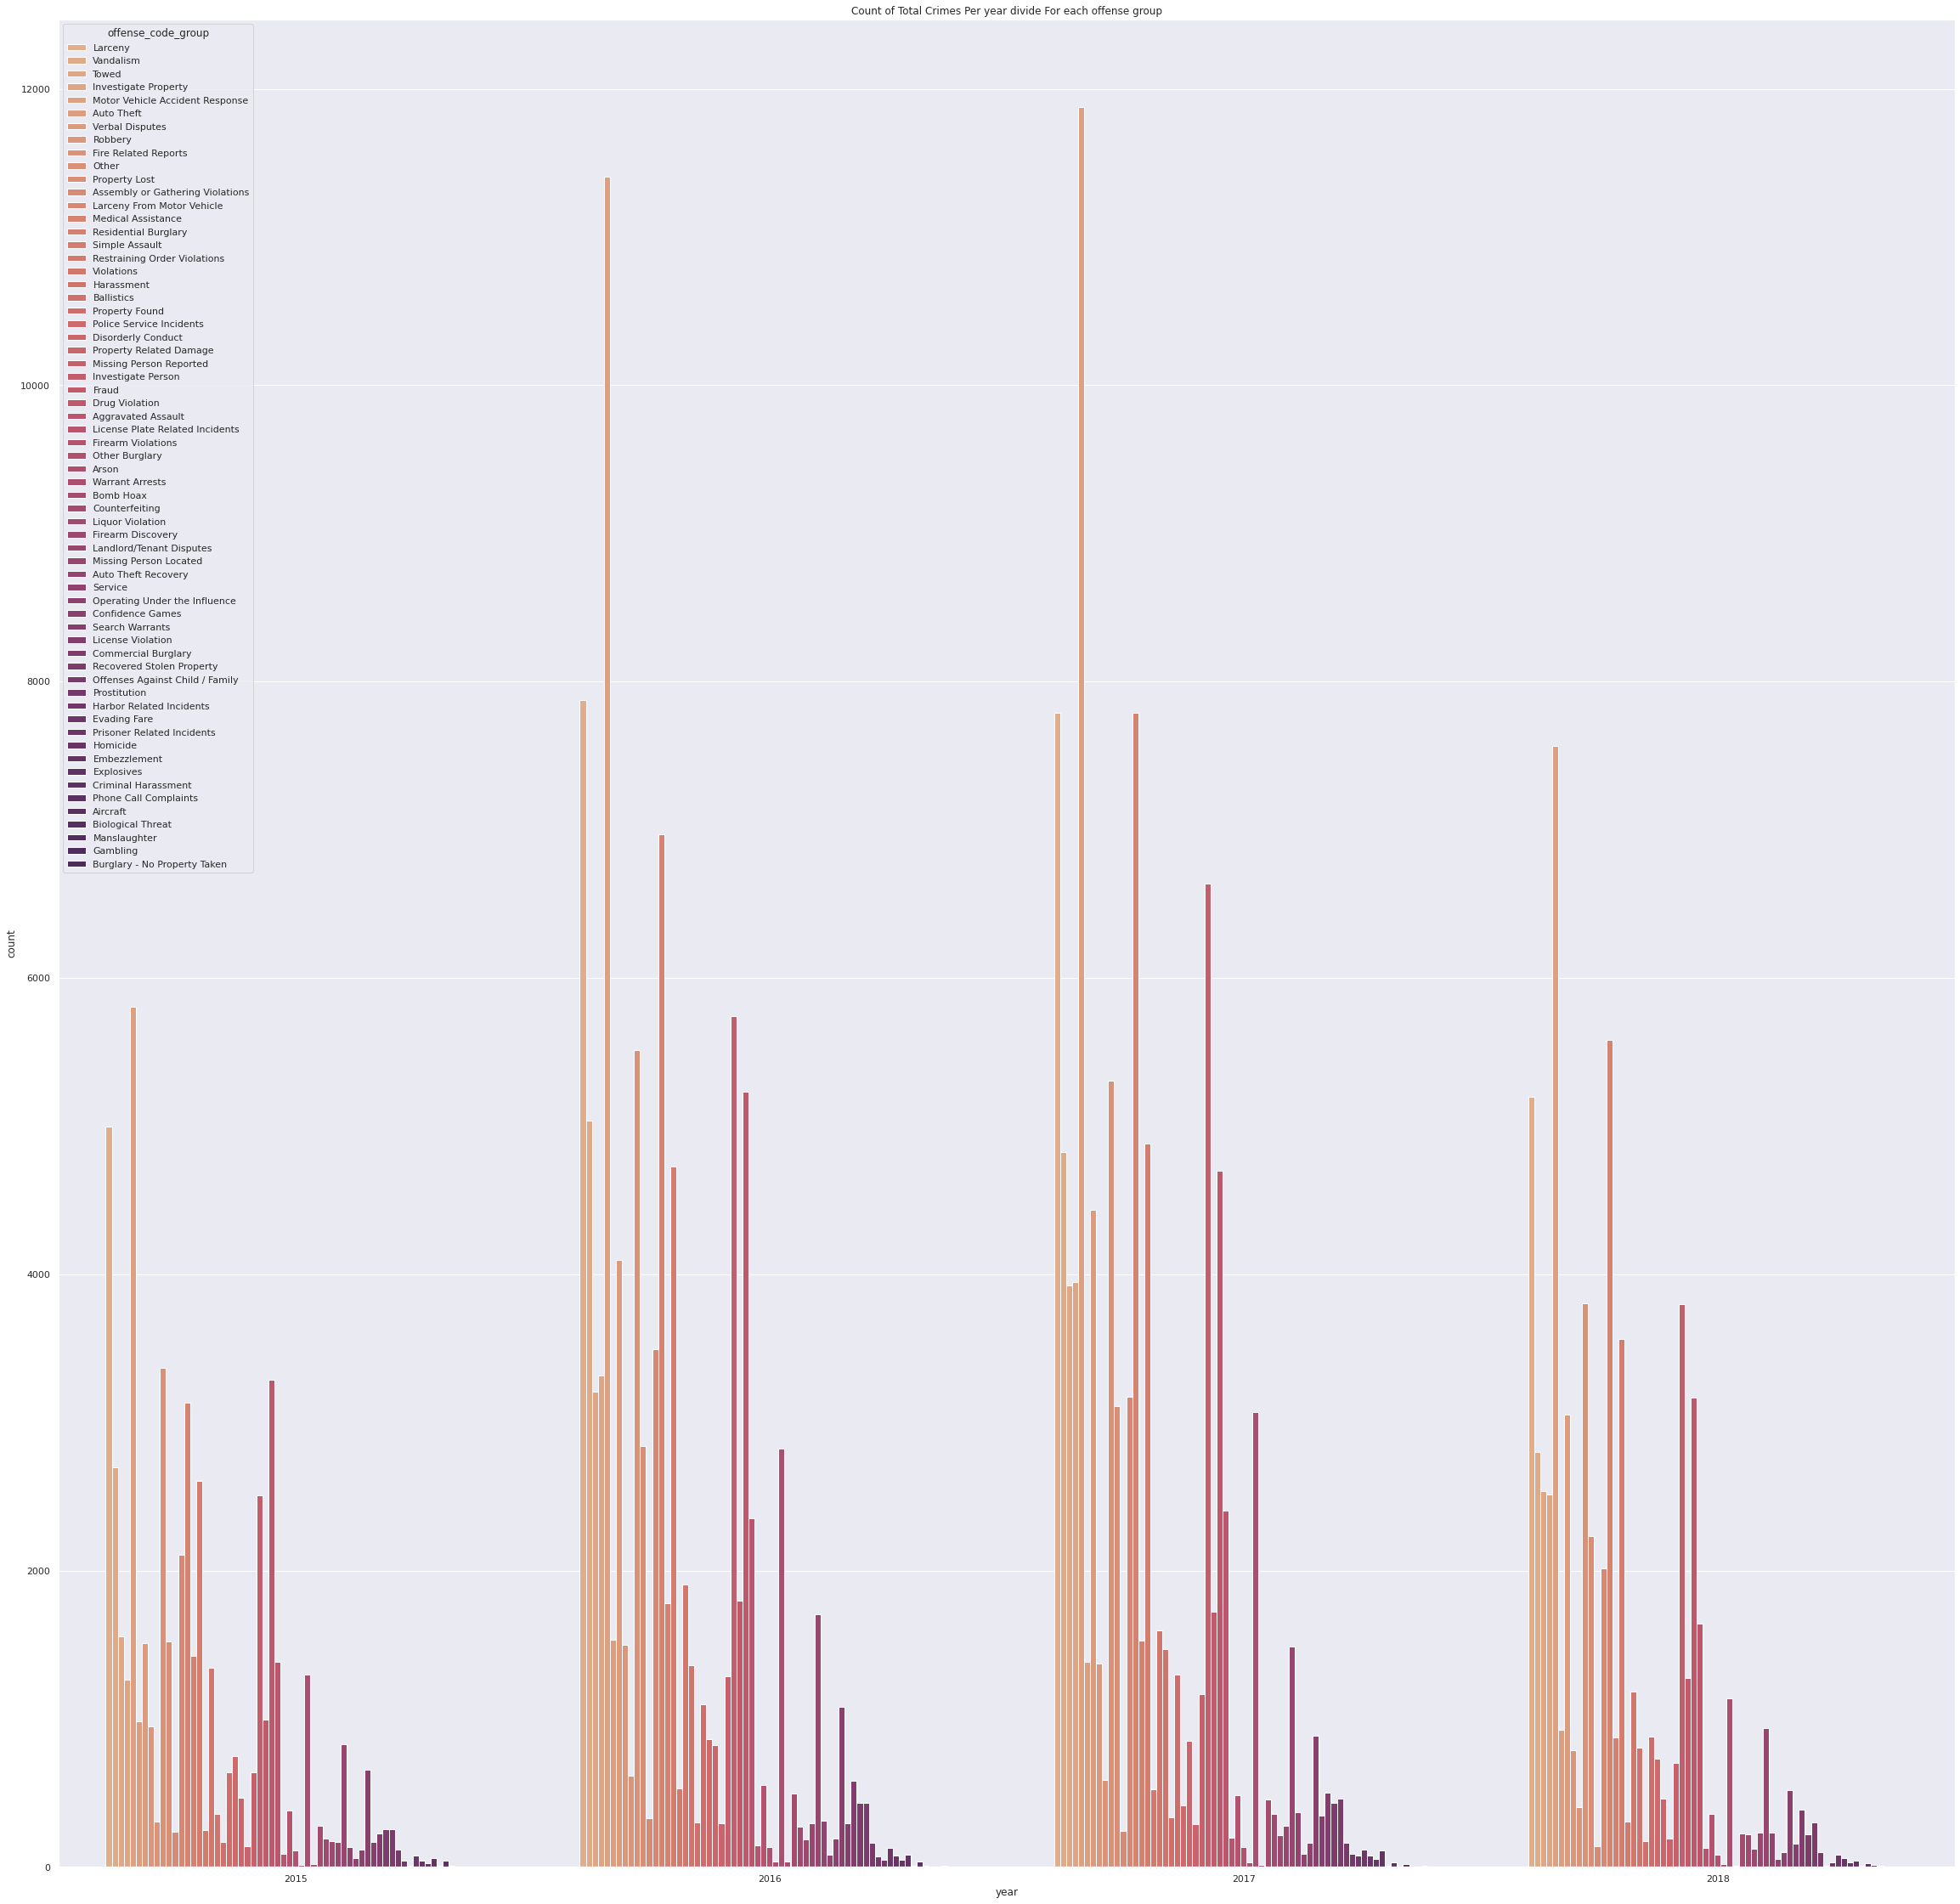

In [ ]:
plt.figure(figsize=(40,40))
sns.countplot(x='year', data=df, palette='flare', hue='offense_code_group')
plt.title("Count of Total Crimes Per year divide For each offense group")

Total crimes per year for each district 

Text(0.5, 1.0, 'Count of Total Crimes Per year divide For each district')

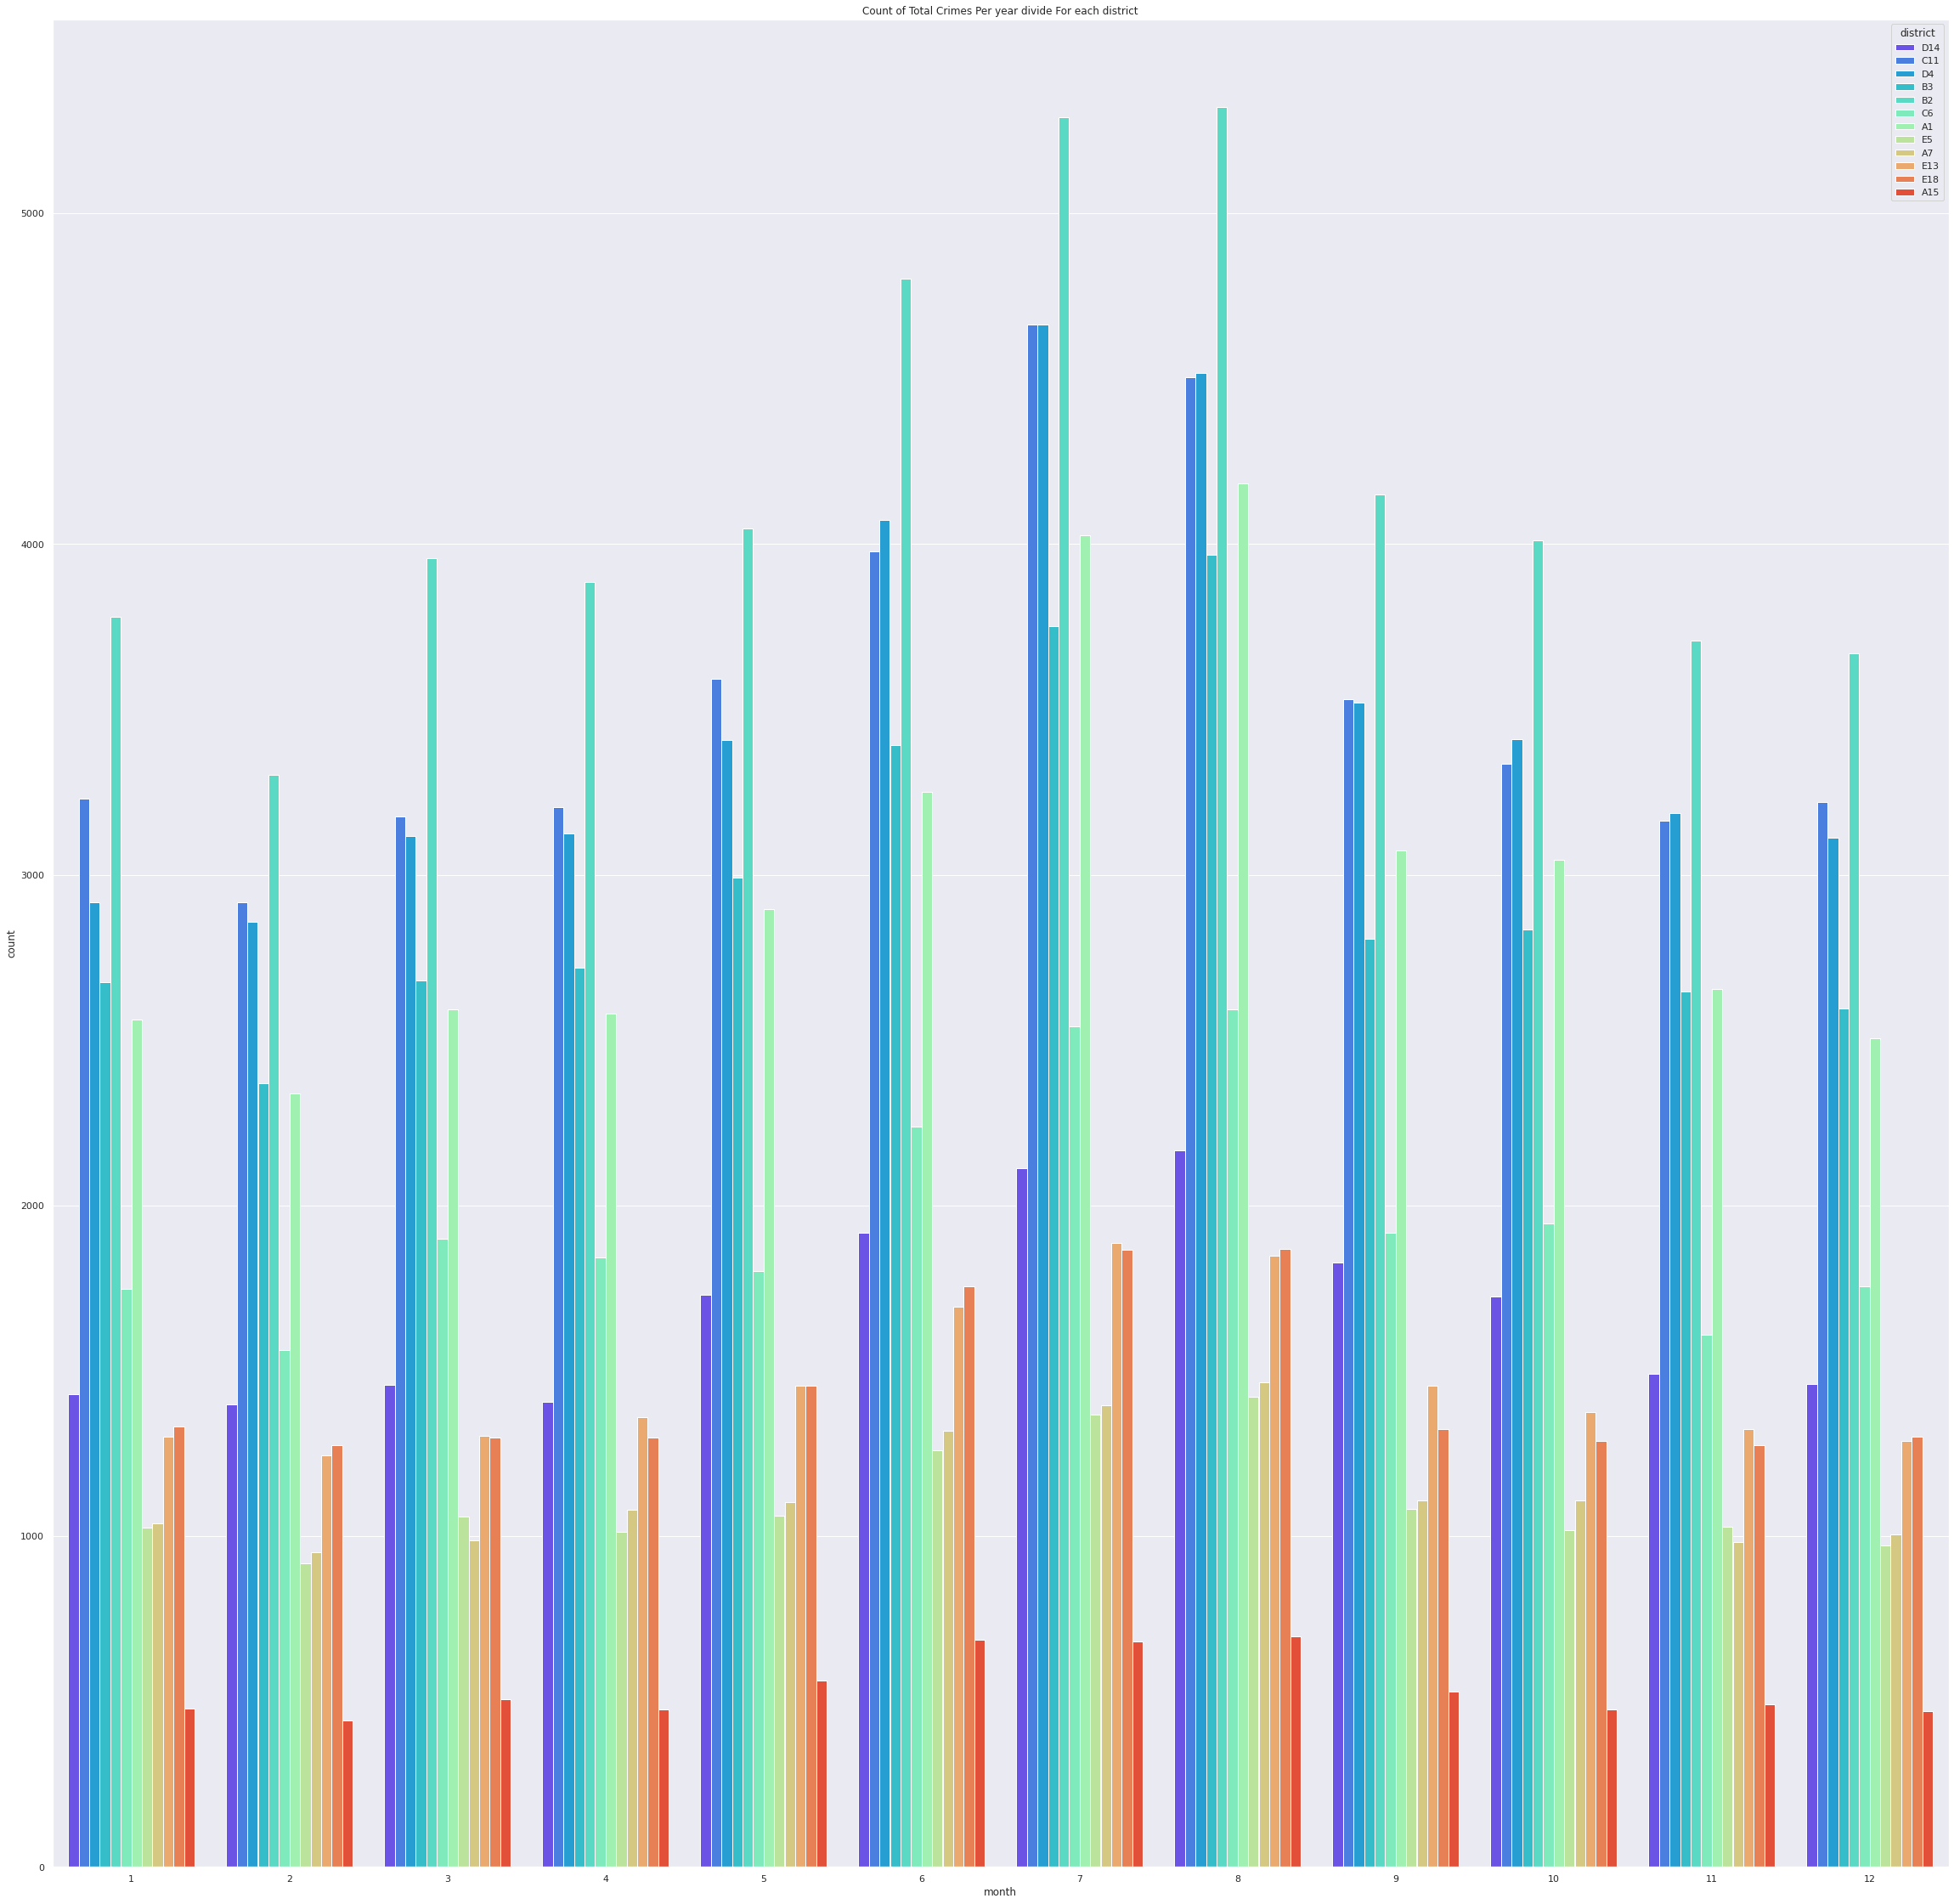

In [ ]:
plt.figure(figsize=(40,40))
sns.countplot(x='month', data=df, palette='rainbow', hue='district')
plt.title("Count of Total Crimes Per year divide For each district")

### Answers

MAIN OBJECTIVE

The purpose for this study is to understand the areas in Boston that are prone to crime from the year 2018.

SPECIFIC OBJECTIVES

1. We want to understand the frequency of when all these crimes are done
2. What is the most occurring type of crime in Boston
3. What is the time of the year with the highest rates of crime 
4. How they were committed 
5. What point of the year the majority of them are committed. 
6. We want to get a clear understanding of what sort of crimes are mostly committed.
7. What crimes are most likely to happen
8. If any crimes are linked to particular dates or months of a year
9. How best to deploy the policing resources of Boston


1. We want to understand the frequency of when all these crimes are done

In [ ]:
groupby_df = df.groupby(["year", "month", "offense_code_group"]).count()
groupby_df.sort_values(by = "offense_code", ascending = False)["offense_code"]

year    month  offense_code_group             
2018.0  6.0    Motor Vehicle Accident Response    1046
        8.0    Motor Vehicle Accident Response     980
        5.0    Motor Vehicle Accident Response     975
        3.0    Motor Vehicle Accident Response     971
        7.0    Motor Vehicle Accident Response     948
                                                  ... 
2017.0  10.0   Vandalism                             1
        11.0   Bomb Hoax                             1
               Embezzlement                          1
               Investigate Person                    1
2018.0  4.0    Bomb Hoax                             1
Name: offense_code, Length: 645, dtype: int64

In [ ]:
%%sql
select year,month,offense_code_group,count(offense_code_group) as offense_count from clean_crime
group by year ,month ,offense_code_group
order by offense_count desc , month asc limit 10

 * sqlite://
Done.


year,month,offense_code_group,offense_count
2018.0,6.0,Motor Vehicle Accident Response,1046
2018.0,8.0,Motor Vehicle Accident Response,980
2018.0,5.0,Motor Vehicle Accident Response,975
2018.0,3.0,Motor Vehicle Accident Response,971
2018.0,7.0,Motor Vehicle Accident Response,948
2018.0,4.0,Motor Vehicle Accident Response,858
2018.0,5.0,Medical Assistance,805
2018.0,6.0,Medical Assistance,788
2018.0,7.0,Larceny,784
2018.0,4.0,Medical Assistance,722


In [ ]:
%%sql
select year, month,offense_code_group,count(month) as month_count from clean_crime
group by month 
order by month_count DESC  , month 

 * sqlite://
Done.


year,month,offense_code_group,month_count
2018.0,5.0,Violations,8856
2016.0,6.0,Other,8782
2017.0,7.0,Property Lost,8468
2016.0,8.0,Property Lost,8259
2018.0,4.0,Verbal Disputes,7848
2017.0,3.0,Fraud,7655
2018.0,2.0,Aggravated Assault,6286
2017.0,9.0,Motor Vehicle Accident Response,655
2018.0,1.0,Property Lost,212
2017.0,12.0,Fraud,89


2. What is the most occurring type of crime in Boston

In [ ]:
df

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,year,month,day_of_week,hour,ucr_part
0,I182070945,619,Larceny,larceny all others,D14,808,2018.0,9.0,Sunday,13.0,1
1,I182070943,1402,Vandalism,vandalism,C11,347,2018.0,8.0,Tuesday,0.0,2
2,I182070941,3410,Towed,towed motor vehicle,D4,151,2018.0,9.0,Monday,19.0,3
3,I182070940,3114,Investigate Property,investigate property,D4,272,2018.0,9.0,Monday,21.0,3
4,I182070938,3114,Investigate Property,investigate property,B3,421,2018.0,9.0,Monday,21.0,3
...,...,...,...,...,...,...,...,...,...,...,...
57715,I182009087,3802,Motor Vehicle Accident Response,m/v accident - property damage,A15,38,2018.0,2.0,Saturday,22.0,3
57716,I182009086,3111,License Violation,license premise violation,E5,560,2018.0,2.0,Saturday,23.0,3
57717,I182009085,1402,Vandalism,vandalism,D14,802,2018.0,2.0,Saturday,22.0,2
57718,I182009084,802,Simple Assault,assault simple - battery,C11,362,2018.0,2.0,Saturday,22.0,2


In [ ]:
(df.groupby(["offense_code_group"]).count()).sort_values(by = "offense_code", ascending = False).head(1)["offense_code"]

offense_code_group
Motor Vehicle Accident Response    6524
Name: offense_code, dtype: int64

In [ ]:
#sql version can show a list of most commited crimes arranged from the most to the least
%%sql
select offense_code_group,count(offense_code) as offense_count from clean_crime
group by offense_code_group
order by offense_code desc limit 5

3. What is the time of the year with the highest rates of crime

In [ ]:
groupby_df2 = (df.groupby(["year", "month"]).count()).sort_values(by = "offense_code", ascending = False)
groupby_df2.head(1)["offense_code"]

year    month
2018.0  5.0      8841
Name: offense_code, dtype: int64

4. How they were committed ?

In [ ]:
groupby_df.loc[(2017, 8)]["offense_code"]

offense_code_group
Embezzlement                       1
Fraud                              4
Harassment                         3
Investigate Person                 3
Larceny                            1
Motor Vehicle Accident Response    1
Property Lost                      5
Vandalism                          1
Warrant Arrests                    1
Name: offense_code, dtype: int64

5. What point of the year is the most common type of crime

In [ ]:
groupby_df = df.groupby(["offense_code_group", "month"]).count()
groupby_df

incident_number  offense_code  ...  hour  ucr_part
offense_code_group month                                 ...                
Aggravated Assault 2.0                165           165  ...   165       165
                   3.0                178           178  ...   178       178
                   4.0                196           196  ...   196       196
                   5.0                242           242  ...   242       242
                   6.0                240           240  ...   240       240
...                                   ...           ...  ...   ...       ...
Warrant Arrests    6.0                130           130  ...   130       130
                   7.0                117           117  ...   117       117
                   8.0                146           146  ...   146       146
                   9.0                  5             5  ...     5         5
                   12.0                 1             1  ...     1         1

[529 rows x 9 columns]

In [ ]:
groupby_df.loc["Motor Vehicle Accident Response"].sort_values("offense_code", ascending = False).head(1)["offense_code"]

month
6.0    1047
Name: offense_code, dtype: int64

In [ ]:
# August

6. We want to get a clear understanding of what sort of crimes are mostly committed.

In [ ]:
df.groupby(["offense_code_group"]).count().sort_values(by = "offense_code", ascending = False)["offense_code"]

offense_code_group
Motor Vehicle Accident Response     6524
Medical Assistance                  4890
Larceny                             4607
Investigate Person                  3345
Other                               3223
Simple Assault                      3100
Drug Violation                      2716
Verbal Disputes                     2656
Vandalism                           2438
Towed                               2305
Investigate Property                2245
Property Lost                       2103
Larceny From Motor Vehicle          1771
Aggravated Assault                  1454
Fraud                               1243
Violations                          1043
Warrant Arrests                      917
Auto Theft                           825
Missing Person Located               814
Property Found                       791
Residential Burglary                 767
Harassment                           734
Robbery                              663
Police Service Incidents             6

7. What crimes are most likely to happen

In [ ]:
df.groupby(["offense_code_group"]).count().sort_values(by = "offense_code", ascending = False)["offense_code"].head(5)

offense_code_group
Motor Vehicle Accident Response    6524
Medical Assistance                 4890
Larceny                            4607
Investigate Person                 3345
Other                              3223
Name: offense_code, dtype: int64

8. If any crimes are linked to particular dates or months of a year

In [ ]:
groupby_df = df.groupby(["offense_code_group", "year", "month"]).count()
groupby_df["offense_code"]

offense_code_group  year    month
Aggravated Assault  2017.0  6.0        1
                            9.0        1
                            10.0       1
                            12.0       1
                    2018.0  2.0      165
                                    ... 
Warrant Arrests     2018.0  5.0      149
                            6.0      130
                            7.0      117
                            8.0      145
                            9.0        4
Name: offense_code, Length: 645, dtype: int64

**Main Objective**: The purpose for this study is to understand the areas in Boston that are prone to crime from the year 2018.

In [ ]:
(((df.groupby(["district"])).count()).sort_values("offense_code", ascending = False))["offense_code"]

district
B2     8637
D4     7631
C11    7323
B3     6518
A1     6504
C6     4580
D14    3601
E18    3319
E13    3181
E5     2433
A7     2341
A15    1140
Name: offense_code, dtype: int64

In [ ]:
# B2 - 49945

In [ ]:
##The above results can also be obtained using SQL as follows
%%sql
select district,count(district)as dist_count from clean_crime 
group by district   
order by dist_count desc

9.What hours of the day is crime happening often

In [ ]:
%%sql
select hour ,count(hour) as reccuring_crime_hours from clean_crime
order by reccuring_crime_hours desc

NB;Most crimes happen/ are reported at around midnight

10. How best to deploy the policing resources of Boston

In [ ]:
(((df.groupby(["district", "offense_code_group"])).count()).sort_values("offense_code", ascending = False)).head(10)

,,incident_number,offense_code,offense_description,reporting_area,year,month,day_of_week,hour,ucr_part
district,offense_code_group,,,,,,,,,
D4,Larceny,1349,1349,1349,1349,1349,1349,1349,1349,1349
B2,Motor Vehicle Accident Response,1080,1080,1080,1080,1080,1080,1080,1080,1080
C11,Motor Vehicle Accident Response,927,927,927,927,927,927,927,927,927
A1,Larceny,879,879,879,879,879,879,879,879,879
D4,Motor Vehicle Accident Response,671,671,671,671,671,671,671,671,671
C11,Medical Assistance,665,665,665,665,665,665,665,665,665
B3,Motor Vehicle Accident Response,661,661,661,661,661,661,661,661,661
B2,Medical Assistance,659,659,659,659,659,659,659,659,659
B3,Verbal Disputes,585,585,585,585,585,585,585,585,585


In districts with highest rate of crime occurence ,there should be random patrols ,in shifts  with more than two police unites in each districts.

At time periods between 2200hrs and 0300hrs all inshift units should be making rampant random patrols in all districts. It is in this window period where most crimes occurr.